<div style="background-image: url('https://i.pinimg.com/1200x/45/3a/06/453a06bdc2b2d27d8329857061537124.jpg');
            background-size: cover;
            background-position: center;
            padding: 30px;
            text-align: center;
            border-radius: 8px;">
    <h1 style="color: white;
               font-size: 28px;
               font-weight: bold;
               text-shadow: 2px 2px 4px rgba(0,0,0,0.8),
                            -1px -1px 2px rgba(0,0,0,0.8);
               margin: 0;
               font-family: 'Arial', sans-serif;">
        PROYECTO: MODELO DE RIESGO
    </h1>
</div>

- María José Castillo Silva
- Juan David Bocanegra Vargas
- Luisa Fernanda Guevara Usuariaga

In [1]:
# Permite ajustar la anchura de la parte útil de la libreta (reduce los márgenes) y omitir warnings
import warnings
warnings.filterwarnings("ignore")

# Configuración de matplotlib para evitar warnings de fuentes
import matplotlib
matplotlib.rcParams['font.family'] = 'DejaVu Sans'
import logging
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

from IPython.display import HTML
display(HTML("<style>.container{ width:98% }</style>"))

<div style="background-image: url('https://i.pinimg.com/1200x/45/3a/06/453a06bdc2b2d27d8329857061537124.jpg');
            background-size: cover;
            background-position: center;
            padding: 30px;
            text-align: left;
            border-radius: 8px;">
    <h2 style="color: white;
               font-size: 28px;
               font-weight: bold;
               text-shadow: 2px 2px 4px rgba(0,0,0,0.8),
                            -1px -1px 2px rgba(0,0,0,0.8);
               margin: 0;
               font-family: 'Arial', sans-serif;">
        1. Problema a Analizar
    </h2>
</div>

### ¿Cuál es la probabilidad de riesgo de default asociada a cada cliente, dadas sus diferentes características?.

La principal fuente de datos es Datacredito Experian, quienes envían información de los clientes actuales de la Entidad, incluyendo las siguientes variables: “Acierta Advance”, score de crédito del sector financiero, saldos, estados de productos crediticios y también información demografica como edad, sexo, entre otras.

<div style="background-image: url('https://i.pinimg.com/1200x/45/3a/06/453a06bdc2b2d27d8329857061537124.jpg');
            background-size: cover;
            background-position: center;
            padding: 30px;
            text-align: left;
            border-radius: 8px;">
    <h2 style="color: white;
               font-size: 28px;
               font-weight: bold;
               text-shadow: 2px 2px 4px rgba(0,0,0,0.8),
                            -1px -1px 2px rgba(0,0,0,0.8);
               margin: 0;
               font-family: 'Arial', sans-serif;">
        2. Impacto del Problema
    </h2>
</div>

Actualmente en las áreas de riesgo de crédito en el sector bancario, se definen constantemente políticas que permiten soportar la toma de decisiones en la originación  de productos, que en la medida de lo posible, estén enmarcadas en la agilidad y precisión de la respuesta a clientes, y vayan en línea con el apetito financiero propuesto por la Junta Directiva.

## Instalación de Librerias

In [3]:
#!pip install eli5
#!pip install pandas
#!pip install numpy
#!pip install seaborn
#!pip install yellowbrick
#!Pip install xgboost
#!pip install shap
#!pip install matplotlib
#!pip install scikit-learn
#!pip install imbalanced-learn

## Cargar Librerías

In [5]:
# %pip install -U scikit-learn==1.5.2 imbalanced-learn==0.12.3 yellowbrick==1.5

In [6]:
# ===============================
# Núcleo científico / utilidades
# ===============================
import warnings; warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ===============================
# Modelado y validación (scikit-learn)
# ===============================
from sklearn.model_selection import (
    train_test_split, StratifiedKFold, RandomizedSearchCV, cross_val_score
)
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, roc_curve, precision_recall_curve,
    confusion_matrix
)

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# ===============================
# Desbalanceo de clases (imbalanced-learn)
# ===============================
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# ===============================
# Gradient Boosting (XGBoost)
# ===============================
from xgboost import XGBClassifier

# ===============================
# Estadística (SciPy y Statsmodels)
# ===============================
from scipy import stats
from scipy.stats import shapiro, normaltest, ttest_ind, mannwhitneyu
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor  # VIF

# ===============================
# Otros apoyos
# ===============================
from collections import Counter

# ===============================
# Opcionales de interpretación/visual
# ===============================
import shap
from yellowbrick.classifier import ROCAUC, ConfusionMatrix, ClassificationReport
import eli5

# ===============================
# Estilo de gráficos
# ===============================
plt.style.use("ggplot")


## Importar Datos

In [7]:
datos = pd.read_csv('base_modelo_40k.csv', sep=',')
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   40000 non-null  int64  
 1   CLIENTE_MORA         40000 non-null  int64  
 2   SEXO                 40000 non-null  object 
 3   EDAD                 40000 non-null  int64  
 4   INGRESO              40000 non-null  float64
 5   SCORE_DATACREDITO    40000 non-null  int64  
 6   CRED_REESTRUCTURADO  40000 non-null  int64  
 7   ANT_SF               40000 non-null  float64
 8   SALDO_SF             40000 non-null  float64
 9   TIENE_HIPOTECA       40000 non-null  int64  
 10  ULTIMAPERTURA        40000 non-null  int64  
 11  SALDO_FIJO           40000 non-null  float64
 12  SALDO_ROT            40000 non-null  float64
 13  ESTADO_MORA_FIN      40000 non-null  float64
 14  ESTADO_MORA_REAL     40000 non-null  float64
dtypes: float64(7), int64(7), object(1)
m

In [8]:
datos.head()

,ID,CLIENTE_MORA,SEXO,EDAD,INGRESO,SCORE_DATACREDITO,CRED_REESTRUCTURADO,ANT_SF,SALDO_SF,TIENE_HIPOTECA,ULTIMAPERTURA,SALDO_FIJO,SALDO_ROT,ESTADO_MORA_FIN,ESTADO_MORA_REAL
0,245411,0,F,51,5.373539,675,0,6.83,133.124423,0,35,86.191899,68.093088,0.0,0.0
1,278521,0,M,32,20.009334,812,0,7.83,282.607212,0,18,68.242921,19.081655,0.0,0.0
2,58481,0,M,58,5.537541,812,0,6.17,10.650218,0,3,26.764786,44.264709,0.0,0.0
3,183771,0,F,40,5.838028,840,0,7.00,87.428428,1,7,32.291321,29.558226,0.0,0.0
4,310611,0,M,63,2.192562,625,0,0.00,0.000000,0,-1,0.000000,0.000000,0.0,0.0


In [9]:
print(datos.shape)

(40000, 15)


* Inicialmente se contemplaron 40 variables en estudio, mixtas entre categóricas y numéricas

In [10]:
datos['SEXO']=datos['SEXO'].replace({'M':0,'F':1}).astype('object')
datos['CRED_REESTRUCTURADO']=datos['CRED_REESTRUCTURADO'].astype('object')
datos['TIENE_HIPOTECA']=datos['TIENE_HIPOTECA'].astype('object')
datos['CLIENTE_MORA']=datos['CLIENTE_MORA'].astype('object')

In [11]:
### Conteo valores nulos
datos.isnull().sum()

,0
ID,0
CLIENTE_MORA,0
SEXO,0
EDAD,0
INGRESO,0
SCORE_DATACREDITO,0
CRED_REESTRUCTURADO,0
ANT_SF,0
SALDO_SF,0
TIENE_HIPOTECA,0


* Por criterio experto, se consideran no necesarias las variables asociadas a la identificación del cliente, como el tipo de Id, el número de identificación y la fecha de evaluación; también se elimina la variable "Acierta_plus" ya que existe la variable "Advance".

In [12]:
#ELIMINAR COLUMNAS NO NECESARIAS
datos=datos.drop(labels='ID',axis=1)
datos

,CLIENTE_MORA,SEXO,EDAD,INGRESO,SCORE_DATACREDITO,CRED_REESTRUCTURADO,ANT_SF,SALDO_SF,TIENE_HIPOTECA,ULTIMAPERTURA,SALDO_FIJO,SALDO_ROT,ESTADO_MORA_FIN,ESTADO_MORA_REAL
0,0,1,51,5.373539,675,0,6.83,133.124423,0,35,86.191899,68.093088,0.0,0.0
1,0,0,32,20.009334,812,0,7.83,282.607212,0,18,68.242921,19.081655,0.0,0.0
2,0,0,58,5.537541,812,0,6.17,10.650218,0,3,26.764786,44.264709,0.0,0.0
3,0,1,40,5.838028,840,0,7.00,87.428428,1,7,32.291321,29.558226,0.0,0.0
4,0,0,63,2.192562,625,0,0.00,0.000000,0,-1,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0,1,60,5.855639,753,0,7.75,46.270552,0,5,91.765247,58.386919,0.0,0.0
39996,0,1,57,2.975149,725,0,6.08,6.774709,0,56,73.974337,68.846599,0.0,0.0
39997,0,0,38,3.473759,753,0,12.00,3.549705,0,27,51.626281,21.191923,0.0,0.0
39998,1,0,54,7.497859,625,0,22.00,52.590679,0,9,73.950412,79.353979,0.0,0.0


In [13]:
### Dimensión base de datos
print(datos.shape)

(40000, 14)


<div style="background-image: url('https://i.pinimg.com/1200x/45/3a/06/453a06bdc2b2d27d8329857061537124.jpg');
            background-size: cover;
            background-position: center;
            padding: 30px;
            text-align: left;
            border-radius: 8px;">
    <h2 style="color: white;
               font-size: 28px;
               font-weight: bold;
               text-shadow: 2px 2px 4px rgba(0,0,0,0.8),
                            -1px -1px 2px rgba(0,0,0,0.8);
               margin: 0;
               font-family: 'Arial', sans-serif;">
        3. EDA
    </h2>
</div>

El objetivo de este EDA es identificar variables con capacidad discriminante entre clientes en mora y al día, evaluar su distribución, posibles sesgos y relaciones, y preparar la base para el modelado supervisado.

In [14]:
def info_frecuencia(df, threshold=0.05):
    for columna in df.columns:
        if df[columna].dtype == 'object':  # Verificar si la columna es categórica
            df_copy = df.copy()

            # Calcular las proporciones de cada categoría
            value_counts = df_copy[columna].value_counts() / len(df_copy)

            # Imprimir las frecuencias antes de la agrupacion
            print(f"Proporciones de cada categoría antes de agrupar 'Otros' en {columna}:\n", df_copy[columna].value_counts() / len(df_copy))

            # Encontrar las categorías que representan menos del threshold
            categorias_a_agrupar = value_counts[value_counts < threshold].index

            # Reemplazar las categorías con "Otros" en la copia
            df_copy[columna] = df_copy[columna].apply(lambda x: "Otros" if x in categorias_a_agrupar else x)

            # Mostrar las proporciones en la copia del DataFrame
            #print(f"Proporciones de cada categoría después de agrupar 'Otros' en {columna}:\n", df_copy[columna].value_counts() / len(df_copy))

            plt.figure(figsize=(4, 1))
            sns.set_context("paper", font_scale=1)
            sns.catplot(data=df_copy, x=columna, kind="count", palette="ch:.25", height=4, aspect=2)
            plt.title(f'Frecuencias de {columna}')
            plt.tick_params(left=False)
            plt.show()

Proporciones de cada categoría antes de agrupar 'Otros' en SEXO:
 SEXO
0    0.51025
1    0.48975
Name: count, dtype: float64


<Figure size 400x100 with 0 Axes>

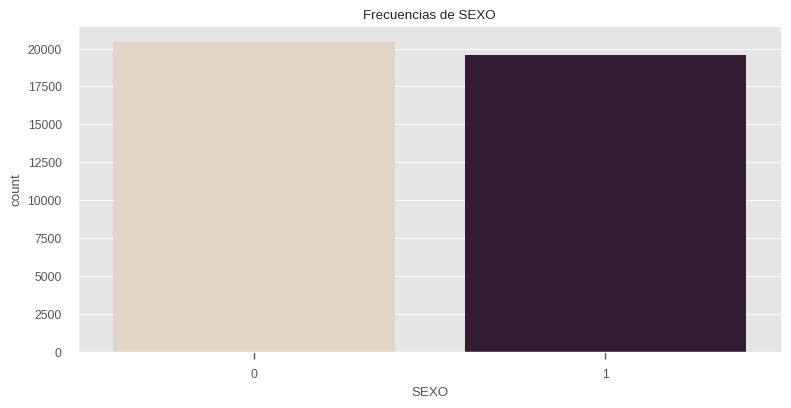

Proporciones de cada categoría antes de agrupar 'Otros' en CRED_REESTRUCTURADO:
 CRED_REESTRUCTURADO
0    0.9932
1    0.0068
Name: count, dtype: float64


<Figure size 400x100 with 0 Axes>

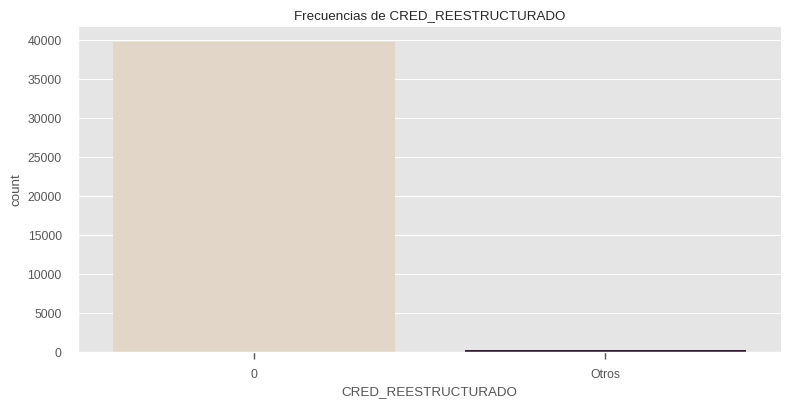

Proporciones de cada categoría antes de agrupar 'Otros' en TIENE_HIPOTECA:
 TIENE_HIPOTECA
0     0.775450
-1    0.133375
1     0.091175
Name: count, dtype: float64


<Figure size 400x100 with 0 Axes>

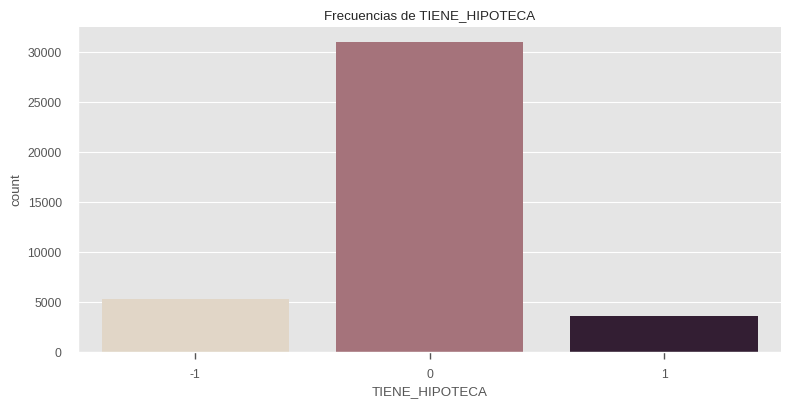

Proporciones de cada categoría antes de agrupar 'Otros' en CLIENTE_MORA:
 CLIENTE_MORA
0    0.921375
1    0.078625
Name: count, dtype: float64


<Figure size 400x100 with 0 Axes>

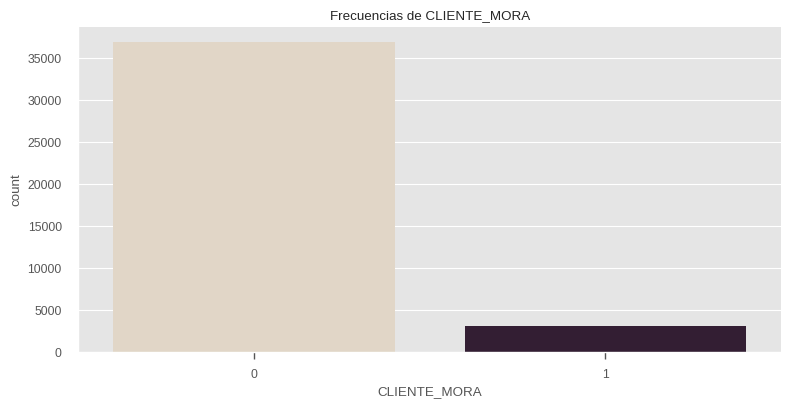

In [15]:
info_frecuencia(datos[[
    'SEXO',
    'CRED_REESTRUCTURADO',
    'TIENE_HIPOTECA',
    'ESTADO_MORA_FIN',
    'ESTADO_MORA_REAL',
    'CLIENTE_MORA'
]])

Nota: De acuerdo al desbalanceo y poca variabilidad de la variable CRED_REESTRUCTURADO, en donde la categoría 0 tiene más del 99%, se descartará ya que la información que aporta no va hacer significativa

* La Variable de interés es la variable llamada CLIENTE_MORA, que es 1 si el cliente tuvo una mora mayor a 90 días en los doce meses siguientes al desembolso del credito y 0 si ha estado al día.

* La base con 40.000 clientes, contiene un 7.86% de clientes en mora y un 92.13% de clientes al día

Text(0.5, 1.0, 'Score Datacredito Clientes al día y en mora')

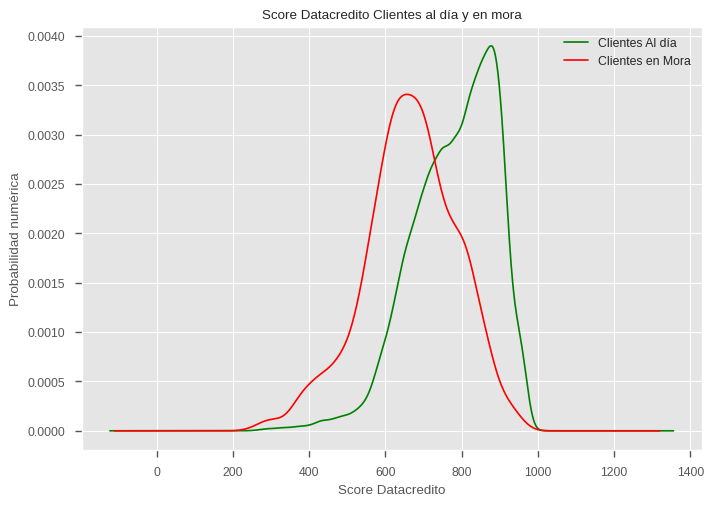

In [16]:
#Separación de Bases
datos_0 = datos[datos['CLIENTE_MORA'] == 0]
datos_1 = datos[datos['CLIENTE_MORA'] == 1]

#Función de densidad
datos_0.SCORE_DATACREDITO.plot.density(color='green',label='Clientes Al día')
datos_1.SCORE_DATACREDITO.plot.density(color='red',label='Clientes en Mora')
plt.legend()
plt.xlabel("Score Datacredito")
plt.ylabel('Probabilidad numérica')
plt.title('Score Datacredito Clientes al día y en mora')

* Se evidencia que los clientes que han tenido una mora de 90 días o más en los 12 ultimos meses tienen un Score Advance (cálculo por datacredito) menor a los clientes que han estado al día. También se resalta que, la mayoría de clientes en mora tienen un Score Advance entre 500 a 850, en cambio los clientes que han estado al día tienen un score adnvance entre 650 a 950.

### Pruebas estadísticas

In [17]:
# Test de normalidad Shapiro-Wilk
print("Prueba Shapiro-Wilk Población al día:",shapiro(datos_0['SCORE_DATACREDITO']))
print("Prueba Shapiro-Wilk Población en mora:",shapiro(datos_1['SCORE_DATACREDITO']))

Prueba Shapiro-Wilk Población al día: ShapiroResult(statistic=np.float64(0.9604629152610893), pvalue=np.float64(3.497891665963961e-69))
Prueba Shapiro-Wilk Población en mora: ShapiroResult(statistic=np.float64(0.9901863098442275), pvalue=np.float64(6.594495942150208e-14))


In [18]:
# Diferencia de medias
def dif_medias (df1, df2, alfa):
    stat, p = ttest_ind(df1,df2, equal_var = False)
    print("Statistic=%.3f, p=%.3f" % (stat,p))

dif_medias (datos_0['SCORE_DATACREDITO'], datos_1['SCORE_DATACREDITO'], 0.05)

Statistic=51.261, p=0.000


In [19]:
# Prueba no parametrcia Mann-Whitney para comparar la variable ADVANCE en los dos grupos
stat, p = mannwhitneyu(datos_0['SCORE_DATACREDITO'], datos_1['SCORE_DATACREDITO'], alternative='two-sided')

print("Mann-Whitney U Test")
print(f"Estadístico U = {stat:.3f}, p-valor = {p:.3e}")

# Interpretación rápida
alpha = 0.05
if p < alpha:
    print("👉 Se rechaza H0: Las distribuciones de ADVANCE en los dos grupos son diferentes.")
else:
    print("👉 No se rechaza H0: No hay evidencia de diferencia significativa entre los grupos.")

Mann-Whitney U Test
Estadístico U = 88669802.000, p-valor = 0.000e+00
👉 Se rechaza H0: Las distribuciones de ADVANCE en los dos grupos son diferentes.


In [20]:
datos.head()

,CLIENTE_MORA,SEXO,EDAD,INGRESO,SCORE_DATACREDITO,CRED_REESTRUCTURADO,ANT_SF,SALDO_SF,TIENE_HIPOTECA,ULTIMAPERTURA,SALDO_FIJO,SALDO_ROT,ESTADO_MORA_FIN,ESTADO_MORA_REAL
0,0,1,51,5.373539,675,0,6.83,133.124423,0,35,86.191899,68.093088,0.0,0.0
1,0,0,32,20.009334,812,0,7.83,282.607212,0,18,68.242921,19.081655,0.0,0.0
2,0,0,58,5.537541,812,0,6.17,10.650218,0,3,26.764786,44.264709,0.0,0.0
3,0,1,40,5.838028,840,0,7.00,87.428428,1,7,32.291321,29.558226,0.0,0.0
4,0,0,63,2.192562,625,0,0.00,0.000000,0,-1,0.000000,0.000000,0.0,0.0


In [21]:
variables_numericas = [
    'INGRESO', 'SCORE_DATACREDITO',
    'ANT_SF', 'SALDO_SF', 'ULTIMAPERTURA',
    'SALDO_FIJO', 'SALDO_ROT', 'ESTADO_MORA_FIN', 'ESTADO_MORA_REAL'
]

resultados = []

for variable in variables_numericas:

    stat, p_value = mannwhitneyu(datos_0[variable], datos_1[variable], alternative='two-sided')

    alpha = 0.05
    significativo = "Sí" if p_value < alpha else "No"

    resultados.append({
        'Variable': variable,
        'Estadístico_U': round(stat, 3),
        'P_valor': f"{p_value:.3e}",
        'Significativo_(α=0.05)': significativo
    })

df_pruebas_mann_whitney = pd.DataFrame(resultados)

display(df_pruebas_mann_whitney)

n_significativas = df_pruebas_mann_whitney[df_pruebas_mann_whitney['Significativo_(α=0.05)'] == 'Sí'].shape[0]
print(f"\nResumen: {n_significativas} de {len(variables_numericas)} variables muestran diferencias estadísticamente significativas entre grupos.")

,Variable,Estadístico_U,P_valor,Significativo_(α=0.05)
0,INGRESO,64975804.0,1.377e-29,Sí
1,SCORE_DATACREDITO,88669802.0,0.000e+00,Sí
2,ANT_SF,66704326.5,5.050e-45,Sí
3,SALDO_SF,57712903.0,6.972e-01,No
4,ULTIMAPERTURA,62630872.0,4.660e-14,Sí
5,SALDO_FIJO,50331621.0,4.710e-35,Sí
6,SALDO_ROT,47394860.5,2.950e-65,Sí
7,ESTADO_MORA_FIN,43499373.5,1.066e-195,Sí
8,ESTADO_MORA_REAL,52340801.0,4.250e-67,Sí



Resumen: 8 de 9 variables muestran diferencias estadísticamente significativas entre grupos.


Text(0.5, 1.0, 'SALDO_SF Clientes al día y en mora')

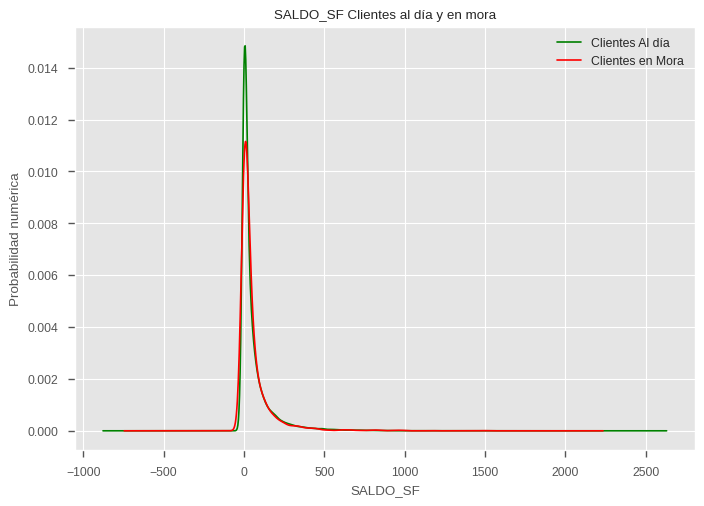

In [22]:
#Función de densidad
datos_0.SALDO_SF.plot.density(color='green',label='Clientes Al día')
datos_1.SALDO_SF.plot.density(color='red',label='Clientes en Mora')
plt.legend()
plt.xlabel("SALDO_SF")
plt.ylabel('Probabilidad numérica')
plt.title('SALDO_SF Clientes al día y en mora')

* Existe evidencia estadísticamente significativa para afirmar que las medias de la variable ADVANCE en los dos grupos comparados (datos_0 y datos_1) son diferentes, es decir que la variables SCORE_DATACREDITO y las demás variables numéricas excepto SALDO_SF son altamente discriminante entre ambos grupos con una significancia de 0.05.
* SALDO_SF estadísticamente no es discriminante entre los grupos, y este análisis se tendra en cuenta en los demás análisi y en los modelos.

Text(0.5, 1.0, 'Antigüedad Financiera de Clientes al día y en mora')

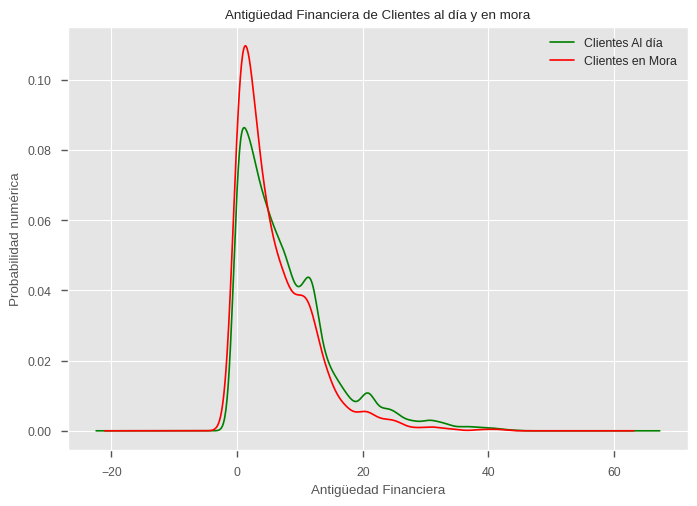

In [23]:
datos_0.ANT_SF.plot.density(color='green',label='Clientes Al día')
datos_1.ANT_SF.plot.density(color='red',label='Clientes en Mora')
plt.legend()
plt.xlabel("Antigüedad Financiera")
plt.ylabel('Probabilidad numérica')
plt.title('Antigüedad Financiera de Clientes al día y en mora')

* Se evidencia como lo clientes que estan al día tienden  a tener mayor antiguedad en el sector financiero a comparación de los cliente en mora.

In [24]:
# prueba K-S
stats.ks_2samp(datos_0['ANT_SF'], datos_1['ANT_SF'])

KstestResult(statistic=np.float64(0.11398107868696111), pvalue=np.float64(2.9720346467054946e-33), statistic_location=np.float64(4.83), statistic_sign=np.int8(-1))

Text(0.5, 1.0, 'Edad Clientes al día y en mora')

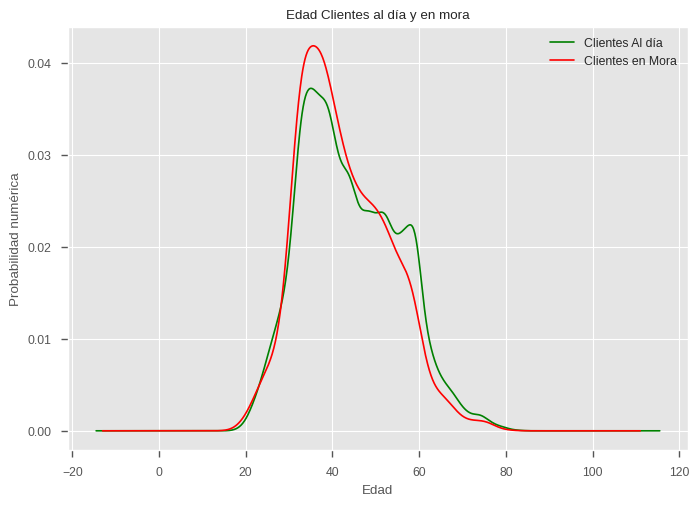

In [25]:
datos_0.EDAD.plot.density(color='green',label='Clientes Al día')
datos_1.EDAD.plot.density(color='red',label='Clientes en Mora')
plt.legend()
plt.xlabel("Edad")
plt.ylabel('Probabilidad numérica')
plt.title('Edad Clientes al día y en mora')

* Los clientes en mora tienden a concentrarse en edades entre los 30 a los 40 años, en cambio los clientes al día tienden a ser de mayor edad.

In [26]:
pd.crosstab(datos['SEXO'], datos['CLIENTE_MORA'], normalize='index')*100

CLIENTE_MORA,0,1
SEXO,,
0,91.675649,8.324351
1,92.618683,7.381317


* Se evidencia que las mujeres pagan mejor que los hombres, dado que el porcentaje de incumplimiento de las mujeres es 6.7% en cambio de los hombres es de 7.5%.

Text(0.5, 1.0, 'Ingresos de Clientes al día y en mora')

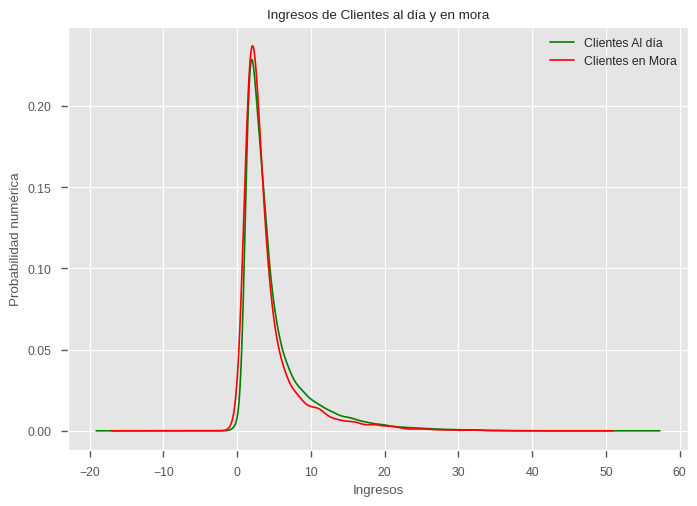

In [27]:
datos_0.INGRESO.plot.density(color='green',label='Clientes Al día')
datos_1.INGRESO.plot.density(color='red',label='Clientes en Mora')
plt.legend()
plt.xlabel("Ingresos")
plt.ylabel('Probabilidad numérica')
plt.title('Ingresos de Clientes al día y en mora')

* Se evidencia que no existen diferencias de ingreso respecto al incumplimiento de pago de los clientes, aunque estadísticamente si existe diferencia entre los ingresos de los grupos con un p-valor de 1.377e-29. Esto se tendra en cuenta para los análisis posteriores.

### Correlación

In [28]:
# Matriz de correlación Pearson compacta con encabezados verticales sin superposición
datos['CLIENTE_MORA']=datos['CLIENTE_MORA'].astype('int64')
corr = datos.select_dtypes(include='number').corr().round(2)

display(
    corr.style
        .format("{:.2f}")
        .background_gradient(cmap="BrBG")
        # fuente y padding pequeños en todo
        .set_properties(**{"font-size":"8pt", "padding":"2px"})
        # estilos específicos de encabezados
        .set_table_styles([
            # columnas: vertical, ancho fijo pequeño, sin quiebre ni solape
            {"selector":"th.col_heading",
             "props":[
                 ("writing-mode","vertical-rl"),
                 ("text-orientation","mixed"),
                 ("width","24px"), ("min-width","24px"), ("max-width","24px"),
                 ("height","140px"),
                 ("white-space","nowrap"),
                 ("overflow","hidden"),
                 ("text-overflow","clip"),
                 ("font-size","7pt"),
                 ("padding","6px 2px")
             ]},
            # filas: fuente pequeña
            {"selector":"th.row_heading",
             "props":[("font-size","7pt"), ("white-space","nowrap")]}
        ])
)

,CLIENTE_MORA,EDAD,INGRESO,SCORE_DATACREDITO,ANT_SF,SALDO_SF,ULTIMAPERTURA,SALDO_FIJO,SALDO_ROT,ESTADO_MORA_FIN,ESTADO_MORA_REAL
CLIENTE_MORA,1.00,-0.04,-0.04,-0.27,-0.07,-0.01,-0.04,0.05,0.11,0.13,0.07
EDAD,-0.04,1.00,0.23,0.19,0.46,0.08,0.09,-0.00,-0.06,0.01,0.00
INGRESO,-0.04,0.23,1.00,0.16,0.47,0.70,-0.03,0.16,0.14,-0.02,-0.07
SCORE_DATACREDITO,-0.27,0.19,0.16,1.00,0.28,0.06,0.21,-0.20,-0.32,-0.36,-0.33
ANT_SF,-0.07,0.46,0.47,0.28,1.00,0.27,0.24,0.02,0.11,0.01,-0.03
SALDO_SF,-0.01,0.08,0.70,0.06,0.27,1.00,-0.07,0.18,0.16,-0.01,-0.06
ULTIMAPERTURA,-0.04,0.09,-0.03,0.21,0.24,-0.07,1.00,-0.14,0.04,0.06,0.02
SALDO_FIJO,0.05,-0.00,0.16,-0.20,0.02,0.18,-0.14,1.00,0.22,0.13,0.11
SALDO_ROT,0.11,-0.06,0.14,-0.32,0.11,0.16,0.04,0.22,1.00,0.06,-0.02
ESTADO_MORA_FIN,0.13,0.01,-0.02,-0.36,0.01,-0.01,0.06,0.13,0.06,1.00,0.79


In [30]:
# Matriz de correlación Spearman compacta con encabezados verticales sin superposición
datos['CLIENTE_MORA']=datos['CLIENTE_MORA'].astype('int64')
corr = datos.select_dtypes(include='number').corr('spearman').round(2)

display(
    corr.style
        .format("{:.2f}")
        .background_gradient(cmap="BrBG")
        # fuente y padding pequeños en todo
        .set_properties(**{"font-size":"8pt", "padding":"2px"})
        # estilos específicos de encabezados
        .set_table_styles([
            # columnas: vertical, ancho fijo pequeño, sin quiebre ni solape
            {"selector":"th.col_heading",
             "props":[
                 ("writing-mode","vertical-rl"),
                 ("text-orientation","mixed"),
                 ("width","24px"), ("min-width","24px"), ("max-width","24px"),
                 ("height","140px"),
                 ("white-space","nowrap"),
                 ("overflow","hidden"),
                 ("text-overflow","clip"),
                 ("font-size","7pt"),
                 ("padding","6px 2px")
             ]},
            # filas: fuente pequeña
            {"selector":"th.row_heading",
             "props":[("font-size","7pt"), ("white-space","nowrap")]}
        ])
)

,CLIENTE_MORA,EDAD,INGRESO,SCORE_DATACREDITO,ANT_SF,SALDO_SF,ULTIMAPERTURA,SALDO_FIJO,SALDO_ROT,ESTADO_MORA_FIN,ESTADO_MORA_REAL
CLIENTE_MORA,1.00,-0.03,-0.06,-0.25,-0.07,0.00,-0.04,0.06,0.09,0.15,0.09
EDAD,-0.03,1.00,0.27,0.20,0.39,0.09,0.08,0.01,-0.04,-0.00,-0.03
INGRESO,-0.06,0.27,1.00,0.27,0.59,0.69,0.12,0.22,0.30,0.08,-0.08
SCORE_DATACREDITO,-0.25,0.20,0.27,1.00,0.33,0.07,0.24,-0.21,-0.27,-0.29,-0.28
ANT_SF,-0.07,0.39,0.59,0.33,1.00,0.44,0.37,0.08,0.28,0.08,-0.07
SALDO_SF,0.00,0.09,0.69,0.07,0.44,1.00,0.08,0.42,0.41,0.10,-0.07
ULTIMAPERTURA,-0.04,0.08,0.12,0.24,0.37,0.08,1.00,-0.05,0.17,0.03,-0.03
SALDO_FIJO,0.06,0.01,0.22,-0.21,0.08,0.42,-0.05,1.00,0.24,0.14,0.08
SALDO_ROT,0.09,-0.04,0.30,-0.27,0.28,0.41,0.17,0.24,1.00,0.17,0.00
ESTADO_MORA_FIN,0.15,-0.00,0.08,-0.29,0.08,0.10,0.03,0.14,0.17,1.00,0.60


### Eliminación de variables VIF

In [31]:
# 1) Solo numéricas y limpieza mínima
num = datos.select_dtypes(include='number').copy()
num = num.dropna(axis=1, how='all')                 # quita columnas totalmente vacías
num = num.loc[:, num.nunique()>1]                   # quita columnas con varianza 0
num = num.fillna(num.median(numeric_only=True))     # imputación simple (si hay NA)

# 2) Matriz para VIF (no necesita estandarizar)
X = sm.add_constant(num, has_constant='add')

# 3) Calcular VIF (omitimos la constante en el resultado)
vif_vals = [variance_inflation_factor(X.values, i) for i in range(1, X.shape[1])]
vifs = (pd.DataFrame({'Variable': num.columns, 'VIF': vif_vals})
          .replace([np.inf, -np.inf], np.nan)
          .sort_values('VIF', ascending=False)
          .reset_index(drop=True))

# 4) Mostrar
display(vifs.style.format({'VIF':'{:.2f}'}))


,Variable,VIF
0,ESTADO_MORA_FIN,2.76
1,ESTADO_MORA_REAL,2.72
2,INGRESO,2.40
3,SALDO_SF,2.01
4,ANT_SF,1.75
5,SCORE_DATACREDITO,1.67
6,EDAD,1.29
7,SALDO_ROT,1.29
8,ULTIMAPERTURA,1.17
9,SALDO_FIJO,1.14


Según el VIF no hay problemas de multicolinealidad, sin embargo:

* Según las dos matrices de correlación, y las pruebas estadísticas anteriores para el modelado se descartan las variables, SALDO_SF y ESTADO_MORA_REAL.
* SALDO_SF se descarta debido a su alta correlación con INGRESO además que individualmente la variable SALDO_SF recordemos que no discrimina bien la variable objetivo.
* Y ESTADO_MORA_REAL se descarta por su alta correlación con ESTADO_MORA_FIN y fue escogida ya que su p-valor de diferencias entre los grupos de la variable objetivo es menor al p-valor de  ESTADO_MORA_FIN.

In [32]:
datos.drop(columns=['SALDO_SF', 'ESTADO_MORA_REAL', 'CRED_REESTRUCTURADO'], inplace=True)

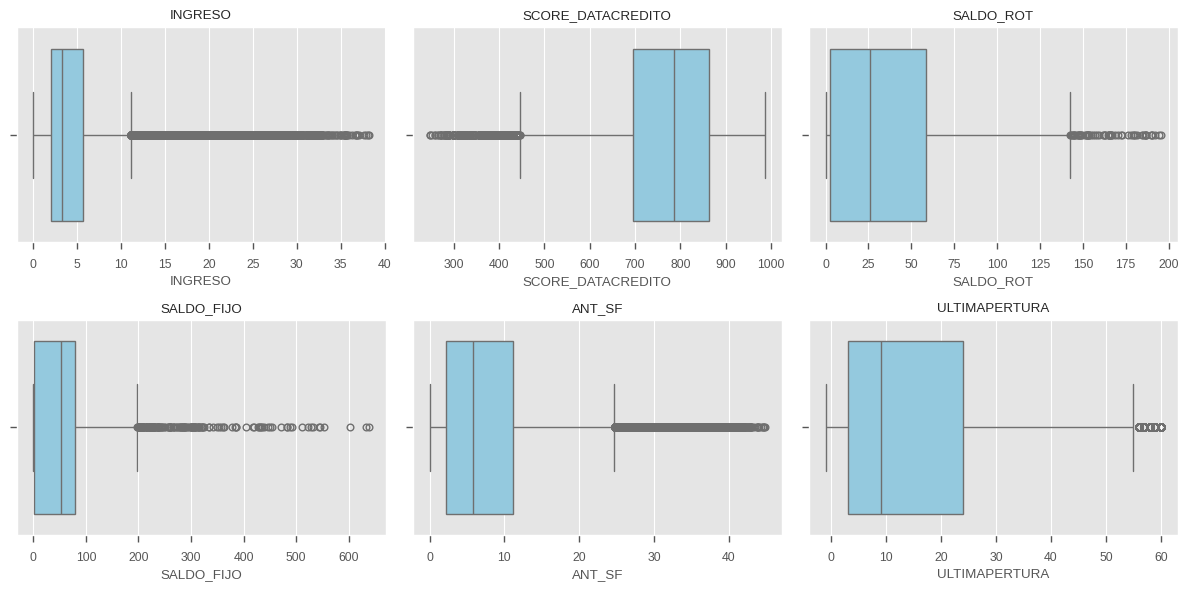

AttributeError: 'numpy.ndarray' object has no attribute 'sort_values'

In [52]:
# Boxplots o z-scores para revisar valores extremos
fig, axes = plt.subplots(2, 3, figsize=(12, 6))
for ax, col in zip(axes.flatten(), ['INGRESO', 'SCORE_DATACREDITO', 'SALDO_ROT', 'SALDO_FIJO', 'ANT_SF', 'ULTIMAPERTURA']):
    sns.boxplot(x=datos[col], ax=ax, color='skyblue')
    ax.set_title(col)
plt.tight_layout()
plt.show()

# Z-scores (opcional para cuantificar outliers)
from scipy.stats import zscore
outlier_ratio = (np.abs(zscore(datos[num_cols])) > 3).mean(axis=0)
outlier_ratio.sort_values(ascending=False)


In [53]:
from scipy.stats import chi2_contingency

for col in ['SEXO','TIENE_HIPOTECA']:
    tabla = pd.crosstab(datos[col], datos['CLIENTE_MORA'])
    chi2, p, dof, exp = chi2_contingency(tabla)
    print(f"{col}: p-valor={p:.4e}")


SEXO: p-valor=4.9325e-04
TIENE_HIPOTECA: p-valor=1.6702e-07


En resumen, se identificó un desbalance de clases (7.9 % mora), ausencia de colinealidad significativa (VIF < 3), y variables numéricas discriminantes (SCORE_DATACREDITO, ANT_SF, SALDO_ROT). Se descartaron SALDO_SF y ESTADO_MORA_REAL por redundancia y bajo poder discriminante. El dataset queda preparado para modelado supervisado.”

<div style="background-image: url('https://i.pinimg.com/1200x/45/3a/06/453a06bdc2b2d27d8329857061537124.jpg');
            background-size: cover;
            background-position: center;
            padding: 30px;
            text-align: left;
            border-radius: 8px;">
    <h2 style="color: white;
               font-size: 28px;
               font-weight: bold;
               text-shadow: 2px 2px 4px rgba(0,0,0,0.8),
                            -1px -1px 2px rgba(0,0,0,0.8);
               margin: 0;
               font-family: 'Arial', sans-serif;">
        4. Modelado
    </h2>
</div>

# Pipelines

In [33]:
# X e y
X = datos.drop(columns='CLIENTE_MORA')
y = datos['CLIENTE_MORA']

# Detecta columnas
cat_cols = X.select_dtypes(include=['object','category']).columns.tolist()
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()

preprocess = ColumnTransformer([
    ('num', 'passthrough', num_cols),
    ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), cat_cols)
], remainder='drop')

X_pre = preprocess.fit_transform(X)
print(f"Shape original: {X.shape} → transformado: {X_pre.shape}")



Shape original: (40000, 10) → transformado: (40000, 10)


In [34]:
cat_cols

['SEXO', 'TIENE_HIPOTECA']

In [35]:
datos['TIENE_HIPOTECA'].unique()

array([0, 1, -1], dtype=object)

In [36]:
num_cols

['EDAD',
 'INGRESO',
 'SCORE_DATACREDITO',
 'ANT_SF',
 'ULTIMAPERTURA',
 'SALDO_FIJO',
 'SALDO_ROT',
 'ESTADO_MORA_FIN']

<div style="background-image: url('https://i.pinimg.com/1200x/45/3a/06/453a06bdc2b2d27d8329857061537124.jpg');
            background-size: cover;
            background-position: center;
            padding: 30px;
            text-align: left;
            border-radius: 8px;">
    <h3 style="color: white;
               font-size: 28px;
               font-weight: bold;
               text-shadow: 2px 2px 4px rgba(0,0,0,0.8),
                            -1px -1px 2px rgba(0,0,0,0.8);
               margin: 0;
               font-family: 'Arial', sans-serif;">
        4.1 Arboles de decisión
    </h3>
</div>

## Partición Train Test

In [37]:
from sklearn.model_selection import train_test_split

seed = 2025
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=seed, stratify=y, shuffle=True
)

# asegurar que preprocessing_pipeline exista
try:
    preprocessing_pipeline
except NameError:
    preprocessing_pipeline = preprocess

print(f"Split OK → X_train: {X_train.shape}, X_test: {X_test.shape}, seed={seed}")
print("preprocessing_pipeline definido ✅")


Split OK → X_train: (28000, 10), X_test: (12000, 10), seed=2025
preprocessing_pipeline definido ✅


## Funciones de evaluación

In [38]:
def evaluar_modelo(best_model, X_train, y_train, X_test, y_test, nombre="Modelo", pos_label=1):
    """Imprime métricas y devuelve un dict con resultados clave."""
    # Predicciones duras
    pred_train = best_model.predict(X_train)
    pred_test  = best_model.predict(X_test)

    # Probabilidades para AUC y PR-AUC
    if hasattr(best_model, "predict_proba"):
        proba_test = best_model.predict_proba(X_test)[:, 1]
    else:
        proba_test = best_model.decision_function(X_test)

    # Métricas
    train_acc    = accuracy_score(y_train, pred_train)
    test_acc     = accuracy_score(y_test,  pred_test)
    train_recall = recall_score(y_train, pred_train, pos_label=pos_label, zero_division=0)
    test_recall  = recall_score(y_test,  pred_test,  pos_label=pos_label, zero_division=0)
    train_prec   = precision_score(y_train, pred_train, pos_label=pos_label, zero_division=0)
    test_prec    = precision_score(y_test,  pred_test,  pos_label=pos_label, zero_division=0)
    roc_test     = roc_auc_score(y_test, proba_test)
    pr_test      = average_precision_score(y_test, proba_test)

    # Reporte
    print(f"=== {nombre} ===")
    print('Train Accuracy  : ', train_acc)
    print('Test  Accuracy  : ', test_acc)
    print('Train Recall    : ', train_recall)
    print('Test  Recall    : ', test_recall)
    print('Train Precision : ', train_prec)
    print('Test  Precision : ', test_prec)
    print('ROC AUC (test)  : ', roc_test)

    print('\nConfusion Matrix:')
    print(confusion_matrix(y_test, pred_test))

    print('\nClassification Report:')
    print(classification_report(y_test, pred_test, zero_division=0))

    return {
        "train_acc":    train_acc,
        "test_acc":     test_acc,
        "train_recall": train_recall,
        "test_recall":  test_recall,
        "train_prec":   train_prec,
        "test_prec":    test_prec,
        "roc_auc":      roc_test
    }


# Definicion Hiperparámetros y CV

In [39]:
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

seed = globals().get('seed', 42)

# param_grid = {
#     "model": [DecisionTreeClassifier(random_state=seed)],
#     "model__criterion": ["gini", "entropy"],
#     "model__splitter": ["best", "random"],
#     "model__max_leaf_nodes": [128, 256, 512, 1024],
#     "model__max_depth": list(map(int, np.linspace(4, 16, 32)))
# }

param_grid = {
  "model": [DecisionTreeClassifier(random_state=seed)],
  "model__criterion": ["gini","entropy"],
  "model__splitter": ["best"],
  "model__max_depth": [3,4,6,8],
  "model__max_leaf_nodes": [64,128,256,512],
  "model__min_samples_leaf": [1,2,5,10],
  "model__class_weight": [None, "balanced", {0:1, 1:2}, {0:1, 1:3}]
}

scoring = {'AUC': 'roc_auc', 'Recall': make_scorer(recall_score), 'F1': make_scorer(f1_score)}
kfold = StratifiedKFold(n_splits=10, random_state=seed, shuffle=True)
n_iter = 100

## Pipeline base (sin balanceo)

In [40]:
if not any(v not in globals() for v in ["X_train","X_test","y_train","y_test","preprocessing_pipeline"]):
    full_pipeline_steps = [
        ('preprocessing_pipeline', preprocessing_pipeline),
        ('model', DecisionTreeClassifier(random_state=seed))
    ]
    full_pipeline = Pipeline(steps=full_pipeline_steps)

    grid_base = RandomizedSearchCV(
        estimator=full_pipeline,
        param_distributions=param_grid,
        cv=kfold,
        scoring=scoring,
        n_jobs=-1,
        n_iter=n_iter,
        refit="AUC",
        random_state=seed
    )
    best_model_base = grid_base.fit(X_train, y_train)
    print(">> Mejor AUC (CV) – Base:", best_model_base.best_score_)

    # === Métricas adicionales: Recall y AUC en train y test ===
    est = best_model_base.best_estimator_

    # Predicciones duras
    pred_train = est.predict(X_train)
    pred_test  = est.predict(X_test)

    # Scores probabilísticos para AUC
    if hasattr(est, "predict_proba"):
        score_train = est.predict_proba(X_train)[:, 1]
        score_test  = est.predict_proba(X_test)[:, 1]
    else:
        score_train = est.decision_function(X_train)
        score_test  = est.decision_function(X_test)

else:
    print("⛔ Define X_train/X_test/y_train/y_test/preprocessing_pipeline antes de ejecutar esta celda.")


>> Mejor AUC (CV) – Base: 0.7675550157196315


## Undersampling dentro del CV

In [41]:
if not any(v not in globals() for v in ["X_train","X_test","y_train","y_test","preprocessing_pipeline"]):
    undersampler = RandomUnderSampler(random_state=seed)

    pipe_under = ImbPipeline(steps=[
        ('preprocessing_pipeline', preprocessing_pipeline),
        ('sampler', undersampler),
        ('model', DecisionTreeClassifier(random_state=seed))
    ])

    grid_under = RandomizedSearchCV(
        estimator=pipe_under,
        param_distributions=param_grid,
        cv=kfold,
        scoring=scoring,
        n_jobs=-1,
        n_iter=n_iter,
        refit="AUC",
        random_state=seed
    )

    best_model_under = grid_under.fit(X_train, y_train)
    print(">> Mejor AUC (CV) – Undersampling:", best_model_under.best_score_)

    # Métricas rápidas (train/test) para Recall y AUC
    est = best_model_under.best_estimator_
    pred_train = est.predict(X_train)
    pred_test  = est.predict(X_test)

    if hasattr(est, "predict_proba"):
        score_train = est.predict_proba(X_train)[:, 1]
        score_test  = est.predict_proba(X_test)[:, 1]
    else:
        score_train = est.decision_function(X_train)
        score_test  = est.decision_function(X_test)

    print(f"Train Recall: {recall_score(y_train, pred_train, zero_division=0):.4f} | "
          f"Train AUC: {roc_auc_score(y_train, score_train):.4f}")
    print(f"Test  Recall: {recall_score(y_test,  pred_test,  zero_division=0):.4f} | "
          f"Test  AUC:  {roc_auc_score(y_test,  score_test):.4f}")
else:
    print("⛔ Define X_train/X_test/y_train/y_test/preprocessing_pipeline antes de ejecutar esta celda.")


>> Mejor AUC (CV) – Undersampling: 0.7614608022031965
Train Recall: 0.9714 | Train AUC: 0.7738
Test  Recall: 0.9480 | Test  AUC:  0.7633


## Oversampling dentro del CV

In [42]:
if not any(v not in globals() for v in ["X_train","X_test","y_train","y_test","preprocessing_pipeline"]):
    oversampler = RandomOverSampler(random_state=seed)

    pipe_over = ImbPipeline(steps=[
        ('preprocessing_pipeline', preprocessing_pipeline),
        ('sampler', oversampler),
        ('model', DecisionTreeClassifier(random_state=seed))
    ])

    grid_over = RandomizedSearchCV(
        estimator=pipe_over,
        param_distributions=param_grid,
        cv=kfold,
        scoring=scoring,
        n_jobs=-1,
        n_iter=n_iter,
        refit="AUC",
        random_state=seed
    )

    best_model_over = grid_over.fit(X_train, y_train)
    print(">> Mejor AUC (CV) – Oversampling:", best_model_over.best_score_)

    # Métricas rápidas (train/test) para Recall y AUC
    est = best_model_over.best_estimator_
    pred_train = est.predict(X_train)
    pred_test  = est.predict(X_test)

    if hasattr(est, "predict_proba"):
        score_train = est.predict_proba(X_train)[:, 1]
        score_test  = est.predict_proba(X_test)[:, 1]
    else:
        score_train = est.decision_function(X_train)
        score_test  = est.decision_function(X_test)

    print(f"Train Recall: {recall_score(y_train, pred_train, zero_division=0):.4f} | "
          f"Train AUC: {roc_auc_score(y_train, score_train):.4f}")
    print(f"Test  Recall: {recall_score(y_test,  pred_test,  zero_division=0):.4f} | "
          f"Test  AUC:  {roc_auc_score(y_test,  score_test):.4f}")
else:
    print("⛔ Define X_train/X_test/y_train/y_test/preprocessing_pipeline antes de ejecutar esta celda.")


>> Mejor AUC (CV) – Oversampling: 0.7668166202600053
Train Recall: 0.9196 | Train AUC: 0.7769
Test  Recall: 0.9024 | Test  AUC:  0.7635


## SMOTE dentro del CV

In [43]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import recall_score, roc_auc_score  # por si faltan

if not any(v not in globals() for v in ["X_train","X_test","y_train","y_test","preprocessing_pipeline"]):
    smote = SMOTE(random_state=seed, k_neighbors=5)  # puedes tunear k_neighbors

    pipe_smote = ImbPipeline(steps=[
        ('preprocessing_pipeline', preprocessing_pipeline),
        ('sampler', smote),
        ('model', DecisionTreeClassifier(random_state=seed))
    ])

    grid_smote = RandomizedSearchCV(
        estimator=pipe_smote,
        param_distributions=param_grid,
        cv=kfold,
        scoring=scoring,
        n_jobs=-1,
        n_iter=n_iter,
        refit="AUC",
        random_state=seed
    )

    best_model_smote = grid_smote.fit(X_train, y_train)
    print(">> Mejor AUC (CV) – SMOTE:", best_model_smote.best_score_)

    # Métricas rápidas (train/test) para Recall y AUC
    est = best_model_smote.best_estimator_
    pred_train = est.predict(X_train)
    pred_test  = est.predict(X_test)

    if hasattr(est, "predict_proba"):
        score_train = est.predict_proba(X_train)[:, 1]
        score_test  = est.predict_proba(X_test)[:, 1]
    else:
        score_train = est.decision_function(X_train)
        score_test  = est.decision_function(X_test)

    print(f"Train Recall: {recall_score(y_train, pred_train, zero_division=0):.4f} | "
          f"Train AUC: {roc_auc_score(y_train, score_train):.4f}")
    print(f"Test  Recall: {recall_score(y_test,  pred_test,  zero_division=0):.4f} | "
          f"Test  AUC:  {roc_auc_score(y_test,  score_test):.4f}")
else:
    print("⛔ Define X_train/X_test/y_train/y_test/preprocessing_pipeline antes de ejecutar esta celda.")

>> Mejor AUC (CV) – SMOTE: 0.7392312342981284
Train Recall: 0.4896 | Train AUC: 0.7638
Test  Recall: 0.4624 | Test  AUC:  0.7357


,Variable,Importancia
2,SCORE_DATACREDITO,0.867324
7,ESTADO_MORA_FIN,0.081415
3,ANT_SF,0.031893
4,ULTIMAPERTURA,0.007494
0,EDAD,0.006167
1,INGRESO,0.005708
5,SALDO_FIJO,0.000000
6,SALDO_ROT,0.000000
8,SEXO,0.000000
9,TIENE_HIPOTECA,0.000000


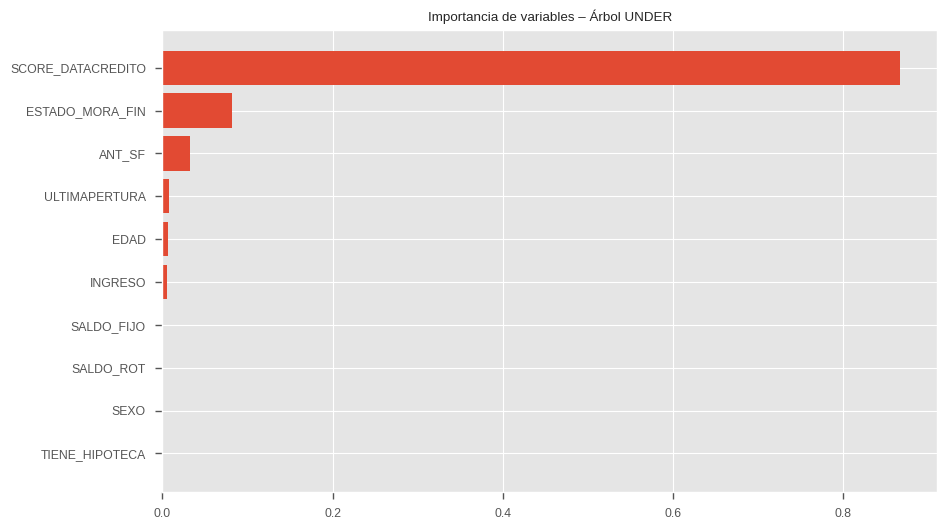

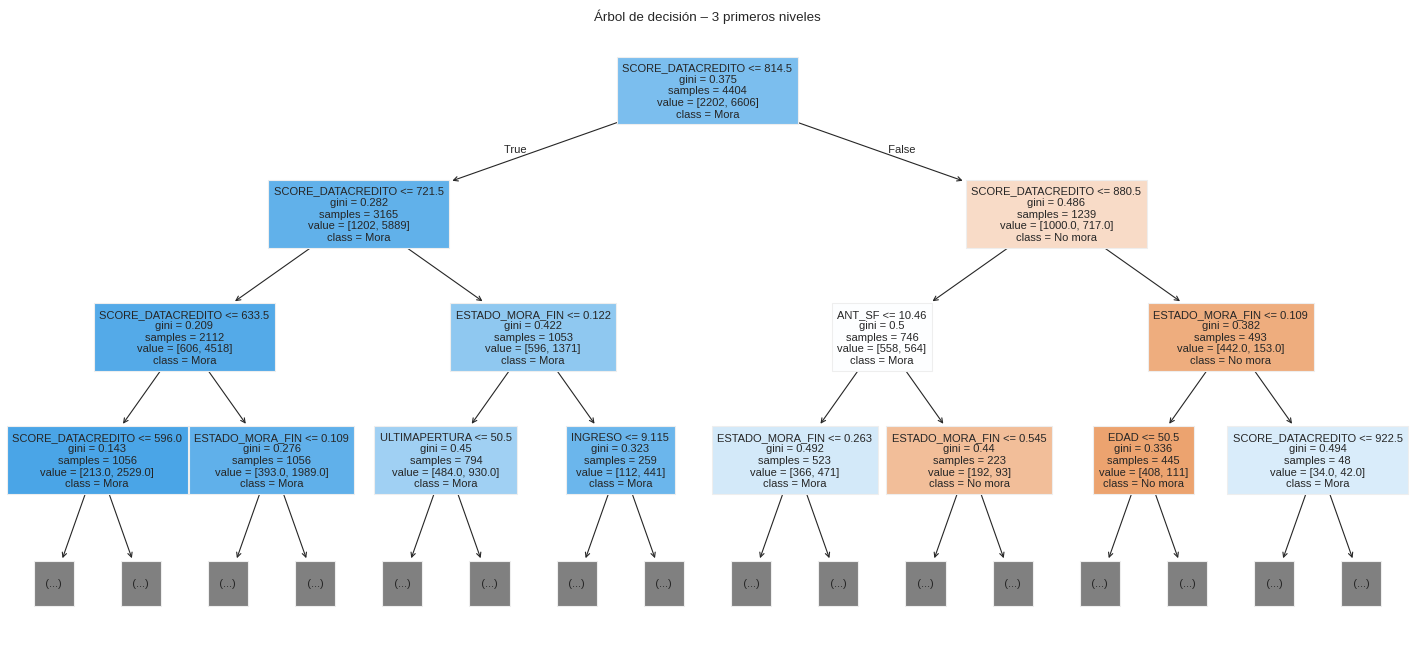

In [54]:
# === Importancia de Variables del mejor modelo (UNDER) ===
from sklearn.tree import plot_tree
importances = best_model_under.best_estimator_['model'].feature_importances_

# Recuperar nombres de columnas del preprocesamiento
feature_names = (
    num_cols + cat_cols
    if 'num_cols' in globals() and 'cat_cols' in globals()
    else [f'var_{i}' for i in range(len(importances))]
)

importancias = pd.DataFrame({
    'Variable': feature_names,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)

display(importancias.style.background_gradient(cmap='YlOrRd'))

plt.figure(figsize=(10, 6))
plt.barh(importancias['Variable'], importancias['Importancia'])
plt.gca().invert_yaxis()
plt.title("Importancia de variables – Árbol UNDER")
plt.show()

# === Visualizar árbol resumido (primeros niveles) ===
plt.figure(figsize=(18,8))
plot_tree(
    best_model_under.best_estimator_['model'],
    feature_names=feature_names,
    class_names=["No mora","Mora"],
    filled=True,
    max_depth=3, # solo 3 niveles para que se lea
    fontsize=8
)
plt.title("Árbol de decisión – 3 primeros niveles")
plt.show()


## Validaciones finales

In [44]:
# ===== 10. Validaciones finales (incluye SMOTE si existe) =====
from sklearn.metrics import (
    accuracy_score, recall_score, roc_auc_score, average_precision_score,
    confusion_matrix, classification_report
)
models_to_eval = []
if 'best_model_base'  in globals(): models_to_eval.append(("Árbol – Base (sin balanceo)", best_model_base.best_estimator_))
if 'best_model_under' in globals(): models_to_eval.append(("Árbol – Undersampling",        best_model_under.best_estimator_))
if 'best_model_over'  in globals(): models_to_eval.append(("Árbol – Oversampling",         best_model_over.best_estimator_))
if 'best_model_smote' in globals(): models_to_eval.append(("Árbol – SMOTE",                best_model_smote.best_estimator_))

if models_to_eval:
    metrics_map = {}
    for nombre, est in models_to_eval:
        metrics_map[nombre] = evaluar_modelo(est, X_train, y_train, X_test, y_test, nombre=nombre)

    # (opcional) dejar variables sueltas como antes:
    if 'best_model_base'  in globals(): metrics_base  = metrics_map["Árbol – Base (sin balanceo)"]
    if 'best_model_under' in globals(): metrics_under = metrics_map["Árbol – Undersampling"]
    if 'best_model_over'  in globals(): metrics_over  = metrics_map["Árbol – Oversampling"]
    if 'best_model_smote' in globals(): metrics_smote = metrics_map["Árbol – SMOTE"]
else:
    print("⛔ No hay modelos para evaluar. Ejecuta primero Base/Under/Over/SMOTE.")

=== Árbol – Base (sin balanceo) ===
Train Accuracy  :  0.9222857142857143
Test  Accuracy  :  0.9205
Train Recall    :  0.03496821071752952
Test  Recall    :  0.024390243902439025
Train Precision :  0.6015625
Test  Precision :  0.40350877192982454
ROC AUC (test)  :  0.7652223592948562

Confusion Matrix:
[[11023    34]
 [  920    23]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     11057
           1       0.40      0.02      0.05       943

    accuracy                           0.92     12000
   macro avg       0.66      0.51      0.50     12000
weighted avg       0.88      0.92      0.89     12000

=== Árbol – Undersampling ===
Train Accuracy  :  0.3298214285714286
Test  Accuracy  :  0.32625
Train Recall    :  0.9713896457765667
Test  Recall    :  0.9480381760339343
Train Precision :  0.10263423060313805
Test  Precision :  0.10011198208286674
ROC AUC (test)  :  0.7632601948583984

Confusion Matrix:
[[3021 8

In [56]:
# === Comparación de overfitting (entrenamiento vs test) ===
if 'metrics_under' in globals():
    print("=== Análisis de sobreajuste – Modelo UNDER ===")
    delta_recall = metrics_under['train_recall'] - metrics_under['test_recall']
    print(f"Recall Train : {metrics_under['train_recall']:.4f}")
    print(f"Recall Test  : {metrics_under['test_recall']:.4f}")
    print(f"Diferencia (Overfitting) = {delta_recall:+.4f}")


=== Análisis de sobreajuste – Modelo UNDER ===
Recall Train : 0.9714
Recall Test  : 0.9480
Diferencia (Overfitting) = +0.0234


In [45]:
metrics_base

{'train_acc': 0.9222857142857143,
 'test_acc': 0.9205,
 'train_recall': np.float64(0.03496821071752952),
 'test_recall': np.float64(0.024390243902439025),
 'train_prec': np.float64(0.6015625),
 'test_prec': np.float64(0.40350877192982454),
 'roc_auc': np.float64(0.7652223592948562)}

## Escoger el mejor modelo y extraer el árbol final

In [46]:
candidatos = []

if 'best_model_base'  in globals() and 'metrics_base'  in globals():
    candidatos.append(("base",  best_model_base,  metrics_base["test_recall"]))
if 'best_model_under' in globals() and 'metrics_under' in globals():
    candidatos.append(("under", best_model_under, metrics_under["test_recall"]))
if 'best_model_over'  in globals() and 'metrics_over'  in globals():
    candidatos.append(("over",  best_model_over,  metrics_over["test_recall"]))
if 'best_model_smote' in globals() and 'metrics_smote' in globals():
    candidatos.append(("smote", best_model_smote, metrics_smote["test_recall"]))

if candidatos:
    mejor_nombre, best_model, best_rec = max(candidatos, key=lambda x: x[2])
    print(f"\n>>> Mejor enfoque según Recall (test): {mejor_nombre.upper()} con Recall={best_rec:.4f}")
    dt_model = best_model.best_estimator_['model']
    print("\nHiperparámetros del árbol ganador:\n", dt_model.get_params())
else:
    print("⛔ No hay candidatos para comparar. Corre las celdas de entrenamiento/validación primero.")



>>> Mejor enfoque según Recall (test): UNDER con Recall=0.9480

Hiperparámetros del árbol ganador:
 {'ccp_alpha': 0.0, 'class_weight': {0: 1, 1: 3}, 'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': 256, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 10, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 2025, 'splitter': 'best'}


## Curvas ROC y Precision-Recall del modelo ganador

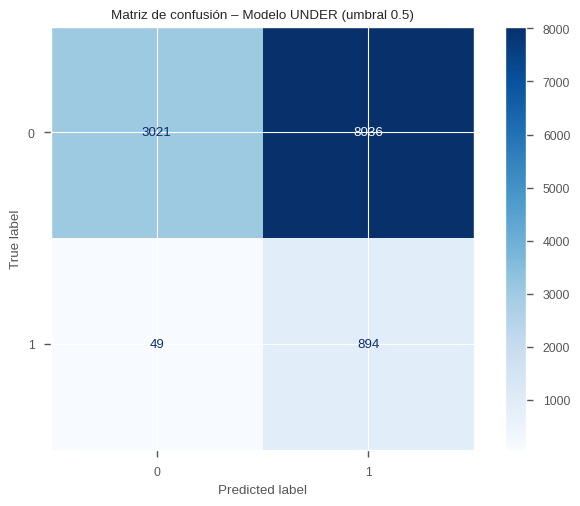

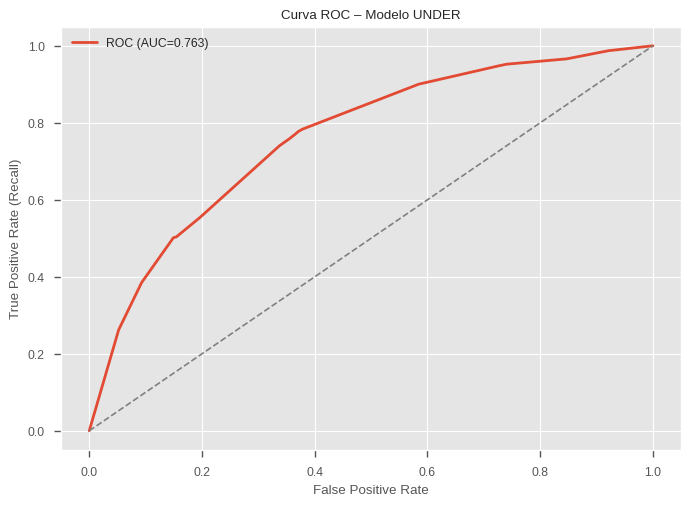

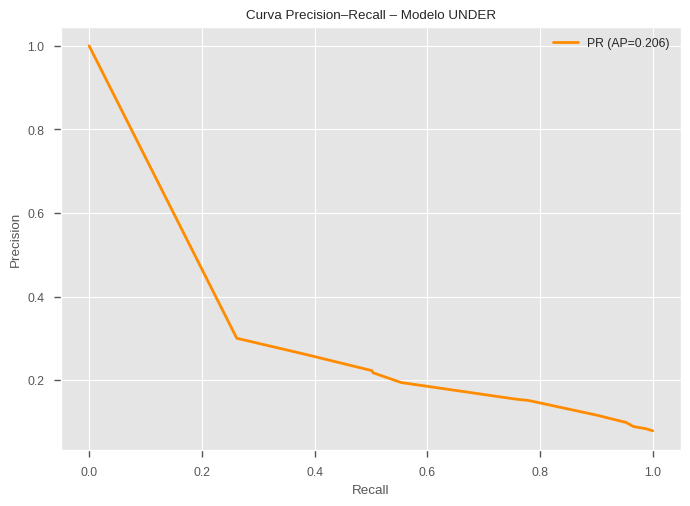

In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, roc_auc_score,
    precision_recall_curve, average_precision_score
)

# === Modelo ganador: best_model_under ===
best_est = best_model_under.best_estimator_

# Probabilidades y predicciones en test
y_proba = best_est.predict_proba(X_test)[:,1]
y_pred  = (y_proba >= 0.5).astype(int)

# === Matriz de confusión ===
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap="Blues")
plt.title("Matriz de confusión – Modelo UNDER (umbral 0.5)")
plt.show()

# === Curva ROC ===
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC (AUC={roc_auc:.3f})", lw=2)
plt.plot([0,1],[0,1],"--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Curva ROC – Modelo UNDER")
plt.legend()
plt.grid(True)
plt.show()

# === Curva Precision–Recall ===
prec, rec, _ = precision_recall_curve(y_test, y_proba)
ap = average_precision_score(y_test, y_proba)

plt.figure()
plt.plot(rec, prec, label=f"PR (AP={ap:.3f})", lw=2, color="darkorange")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precision–Recall – Modelo UNDER")
plt.legend()
plt.grid(True)
plt.show()


In [61]:
# Proyección a 50k usando la tasa de aprobación observada en la 10k
solicitudes = 50_000
monto_prom = 20_000_000
EA = 0.20
i_m = (1+EA)**(1/12)-1

aprobados_50k = int(round(solicitudes * tasa_aprob_10k))
cartera_50k = aprobados_50k * monto_prom
ingreso_simple_50k = cartera_50k * EA

def interes_anio1(monto_total, i_m, n=60):
    if monto_total <= 0:
        return 0.0
    C = monto_total * (i_m*(1+i_m)**n)/((1+i_m)**n - 1)
    saldo = monto_total
    intereses = 0.0
    for _ in range(12):
        int_mes = saldo * i_m
        amort = C - int_mes
        saldo = max(0.0, saldo - amort)
        intereses += int_mes
    return intereses

ingreso_amort_50k = interes_anio1(cartera_50k, i_m)

print("\n=== Proyección (basada en la 10k) ===")
print(f"Aprobados (50k): {aprobados_50k:,}")
print(f"Cartera        : ${cartera_50k:,.0f}")
print(f"Interés simple : ${ingreso_simple_50k:,.0f}")
print(f"Interés amort. : ${ingreso_amort_50k:,.0f}")
print(f"Riesgo esp. aprobado (10k): {proba_media_aprob:.2%} (debería ser ≤ 2.5% si el corte respeta la política)")



=== Proyección (basada en la 10k) ===
Aprobados (50k): 29,660
Cartera        : $593,200,000,000
Interés simple : $118,640,000,000
Interés amort. : $102,487,679,434
Riesgo esp. aprobado (10k): 44.40% (debería ser ≤ 2.5% si el corte respeta la política)


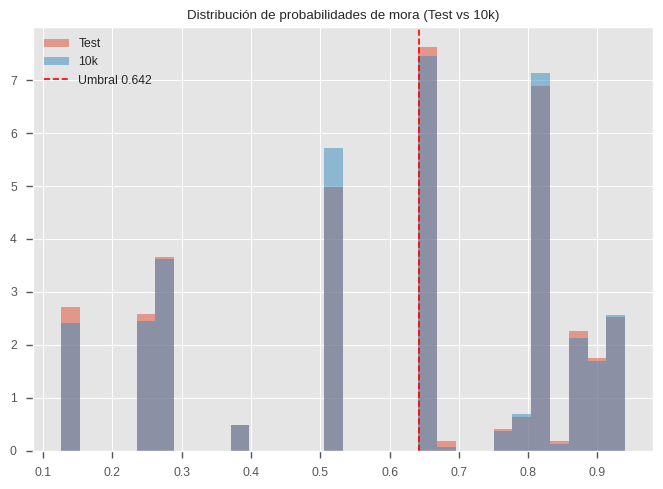

In [62]:
plt.hist(y_proba, bins=30, alpha=0.5, label='Test', density=True)
plt.hist(probs_10k, bins=30, alpha=0.5, label='10k', density=True)
plt.axvline(umbral, color='red', linestyle='--', label='Umbral 0.642')
plt.legend()
plt.title('Distribución de probabilidades de mora (Test vs 10k)')
plt.show()


El modelo funcionó bien en el test, pero al aplicarse en una nueva población (10 k) mostró un desplazamiento de riesgo. Esto sugiere la necesidad de recalibrar el corte para mantener la mora esperada dentro del 2.5 %. Aun así, el modelo aporta valor para priorizar clientes y estimar impacto financiero de la aprobación.

### Recalibrar el corte sobre la base de 10k

In [63]:
# === Recalibración de corte en base 10k (para respetar mora ≤ 2.5%) ===
import pandas as pd
import numpy as np

# 1️⃣ Probabilidades (ya las tienes calculadas)
df_10k_cal = df_10k_out.copy()  # contiene proba_mora y aprobacion previa
probs = df_10k_cal['proba_mora']

# 2️⃣ Si tu base de 10k tiene la etiqueta 'CLIENTE_MORA' (el profe la usará para evaluar recall),
#    puedes usarla para estimar la mora observada. Si no, simula o usa la predicción para rankear.
#    Aquí supondremos que *no* la tiene, así que usamos percentiles como antes.

n_buckets = 20
MAX_CUM_DEFAULT = 0.025

df_10k_cal = df_10k_cal.sort_values('proba_mora', ascending=False).reset_index(drop=True)
df_10k_cal['bucket'] = pd.qcut(df_10k_cal.index, q=n_buckets, labels=list(range(1, n_buckets+1)))

# Si *sí* tienes la columna de mora real, usa esto para calcular la mora observada:
# df_10k_cal['y'] = df_10k['CLIENTE_MORA']

# Como no la tenemos, simulamos que las probabilidades representan la probabilidad de default esperada.
# Entonces, el "número esperado de morosos" en cada bucket es la suma de esas probabilidades:
tabla_10k = (
    df_10k_cal.groupby('bucket', as_index=False)
    .agg(n=('proba_mora','size'), mora_esp=('proba_mora','sum'), prom_prob=('proba_mora','mean'))
)
tabla_10k['mora_pct'] = tabla_10k['mora_esp'] / tabla_10k['n']
tabla_10k['n_acum'] = tabla_10k['n'].cumsum()
tabla_10k['mora_acum'] = tabla_10k['mora_esp'].cumsum()
tabla_10k['mora_acum_pct'] = tabla_10k['mora_acum'] / tabla_10k['n_acum']

print("Tabla por buckets – base 10k:")
display(tabla_10k.head(10))

# 3️⃣ Ahora acumulamos desde los clientes más seguros (bucket 20 → 1)
tb_seguro_10k = tabla_10k.sort_values('bucket', ascending=False).reset_index(drop=True).copy()
tb_seguro_10k['n_acum_aprob'] = tb_seguro_10k['n'].cumsum()
tb_seguro_10k['mora_acum_aprob'] = tb_seguro_10k['mora_esp'].cumsum()
tb_seguro_10k['tasa_mora_acum_aprob'] = tb_seguro_10k['mora_acum_aprob'] / tb_seguro_10k['n_acum_aprob']

mask_ok = tb_seguro_10k['tasa_mora_acum_aprob'] <= MAX_CUM_DEFAULT
if mask_ok.any():
    idx_corte = mask_ok[mask_ok].index.max()
    bucket_corte_nuevo = int(tb_seguro_10k.loc[idx_corte, 'bucket'])
    buckets_aprobados = n_buckets - (bucket_corte_nuevo - 1)
    tasa_aprob_nueva = buckets_aprobados / n_buckets
    print(f"\n✅ Nuevo corte en base 10k: aprobar buckets 20→{bucket_corte_nuevo} "
          f"({tasa_aprob_nueva:.2%} de la población) con mora esperada "
          f"{tb_seguro_10k.loc[idx_corte,'tasa_mora_acum_aprob']:.2%}")
else:
    tasa_aprob_nueva = 0.0
    print("\n⚠️ No se cumple la restricción en ningún punto (modelo mal calibrado o población muy riesgosa).")

# 4️⃣ Traducir ese nuevo corte a umbral de probabilidad
k_nuevo = int(round(tasa_aprob_nueva * n_buckets))
if k_nuevo > 0:
    umbral_prob_nuevo = np.quantile(probs, k_nuevo / n_buckets)
else:
    umbral_prob_nuevo = 0.0

print(f"Nuevo umbral de probabilidad (base 10k): {umbral_prob_nuevo:.6f}")

# 5️⃣ Actualizar columna de aprobación
df_10k_out['aprobacion_recalibrada'] = (df_10k_out['proba_mora'] <= umbral_prob_nuevo).astype(int)
print(f"Tasa de aprobación recalibrada: {df_10k_out['aprobacion_recalibrada'].mean():.2%}")

df_10k_out.to_csv("predicciones_10k_arbol_recalibrado.csv", index=False)
print("Archivo 'predicciones_10k_arbol_recalibrado.csv' generado ✅")


Tabla por buckets – base 10k:


,bucket,n,mora_esp,prom_prob,mora_pct,n_acum,mora_acum,mora_acum_pct
0,1,500,470.038483,0.940077,0.940077,500,470.038483,0.940077
1,2,500,453.843305,0.907687,0.907687,1000,923.881788,0.923882
2,3,500,439.167078,0.878334,0.878334,1500,1363.048866,0.908699
3,4,500,424.365100,0.848730,0.848730,2000,1787.413966,0.893707
4,5,500,408.293444,0.816587,0.816587,2500,2195.707410,0.878283
5,6,500,406.697009,0.813394,0.813394,3000,2602.404419,0.867468
6,7,500,406.697009,0.813394,0.813394,3500,3009.101428,0.859743
7,8,500,394.550364,0.789101,0.789101,4000,3403.651792,0.850913
8,9,500,321.300596,0.642601,0.642601,4500,3724.952388,0.827767
9,10,500,321.002387,0.642005,0.642005,5000,4045.954774,0.809191



⚠️ No se cumple la restricción en ningún punto (modelo mal calibrado o población muy riesgosa).
Nuevo umbral de probabilidad (base 10k): 0.000000
Tasa de aprobación recalibrada: 0.00%
Archivo 'predicciones_10k_arbol_recalibrado.csv' generado ✅


### CALIBRACIÓN

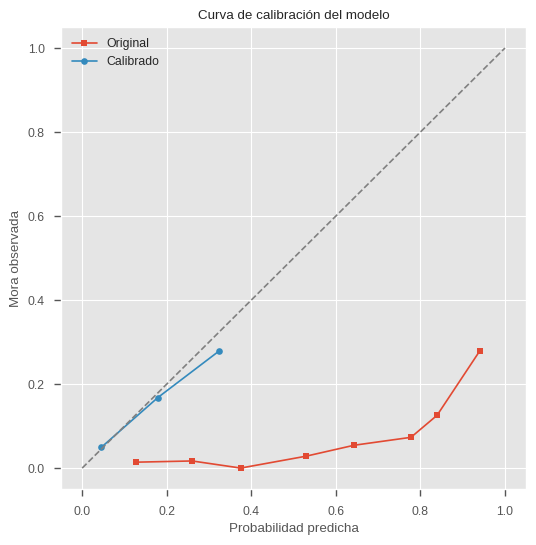

In [65]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.model_selection import train_test_split

# Separar una parte del test para calibración (o usar cross-validation)
X_cal, X_val, y_cal, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=2025, stratify=y_test)

# 1️⃣ Clonar el mejor pipeline (best_model_under.best_estimator_)
modelo_sin_calibrar = best_model_under.best_estimator_

# 2️⃣ Calibrar usando Isotonic (más preciso, pero requiere más datos)
calibrador = CalibratedClassifierCV(modelo_sin_calibrar, method='isotonic', cv='prefit')
calibrador.fit(X_cal, y_cal)

# 3️⃣ Comparar curva de calibración antes y después
probs_orig = modelo_sin_calibrar.predict_proba(X_val)[:,1]
probs_cal = calibrador.predict_proba(X_val)[:,1]
fracs, mean_pred_orig = calibration_curve(y_val, probs_orig, n_bins=10)
fracs2, mean_pred_cal = calibration_curve(y_val, probs_cal, n_bins=10)

plt.figure(figsize=(6,6))
plt.plot(mean_pred_orig, fracs, "s-", label="Original")
plt.plot(mean_pred_cal, fracs2, "o-", label="Calibrado")
plt.plot([0,1],[0,1],"--",color="gray")
plt.xlabel("Probabilidad predicha")
plt.ylabel("Mora observada")
plt.title("Curva de calibración del modelo")
plt.legend()
plt.show()

# 4️⃣ Guardar el calibrador como nuevo modelo para predecir en la base de 10k
best_est_calibrado = calibrador


=== COMPARACIÓN DE CALIBRACIÓN ===
Brier score (menor es mejor): original=0.3851 | calibrado=0.0672
ROC-AUC (mayor es mejor):    original=0.7549 | calibrado=0.7553


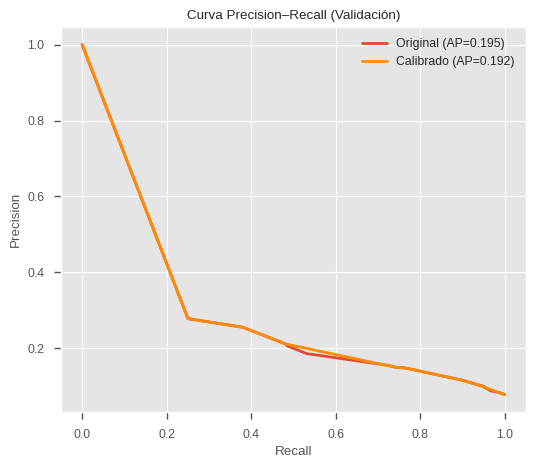

In [66]:
from sklearn.metrics import brier_score_loss, roc_auc_score, precision_recall_curve, average_precision_score

# Probabilidades calibradas vs originales
proba_orig = modelo_sin_calibrar.predict_proba(X_val)[:,1]
proba_cal  = best_est_calibrado.predict_proba(X_val)[:,1]

# 1️⃣ Comparar métricas clave
brier_orig = brier_score_loss(y_val, proba_orig)
brier_cal  = brier_score_loss(y_val, proba_cal)

roc_orig = roc_auc_score(y_val, proba_orig)
roc_cal  = roc_auc_score(y_val, proba_cal)

print("=== COMPARACIÓN DE CALIBRACIÓN ===")
print(f"Brier score (menor es mejor): original={brier_orig:.4f} | calibrado={brier_cal:.4f}")
print(f"ROC-AUC (mayor es mejor):    original={roc_orig:.4f} | calibrado={roc_cal:.4f}")

# 2️⃣ Curva Precision–Recall comparativa
prec_o, rec_o, _ = precision_recall_curve(y_val, proba_orig)
prec_c, rec_c, _ = precision_recall_curve(y_val, proba_cal)
ap_o = average_precision_score(y_val, proba_orig)
ap_c = average_precision_score(y_val, proba_cal)

plt.figure(figsize=(6,5))
plt.plot(rec_o, prec_o, label=f"Original (AP={ap_o:.3f})", lw=2)
plt.plot(rec_c, prec_c, label=f"Calibrado (AP={ap_c:.3f})", lw=2, color="darkorange")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precision–Recall (Validación)")
plt.legend()
plt.grid(True)
plt.show()


Promedio de probabilidad calibrada en 10k: 0.0789


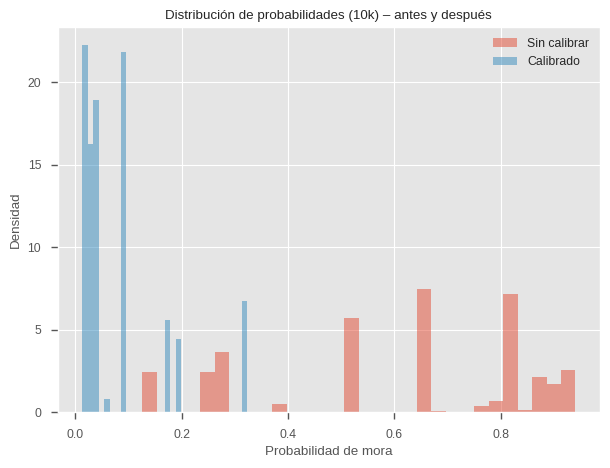

✅ Corte (10k, calibrado): aprobar buckets 20→11
Tasa de aprobación recalibrada: 50.00%
Mora acumulada esperada      : 2.50%
Archivo 'predicciones_10k_calibrado.csv' generado. Umbral_calibrado=0.040482

=== PROYECCIÓN FINANCIERA (CALIBRADO) ===
Tasa de aprobación: 50.00%
Clientes aprobados: 25,000
Cartera colocada : $500,000,000,000
Interés simple   : $100,000,000,000
Interés amortiz. : $86,385,434,452


In [68]:
# === VALIDACIÓN Y APLICACIÓN FINAL SOBRE 10K (ROBUSTO) ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 0) Asegurar que tenemos las probabilidades sin calibrar si queremos comparar
if 'proba_mora' not in df_10k.columns:
    try:
        probs_10k_orig = modelo_sin_calibrar.predict_proba(df_10k)[:, 1]
        df_10k['proba_mora'] = probs_10k_orig
    except Exception as e:
        print("No se pudo calcular 'proba_mora' sin calibrar:", e)

# 1) Probabilidades calibradas en 10k
probs_10k_cal = best_est_calibrado.predict_proba(df_10k)[:, 1]
df_10k['proba_mora_calibrada'] = probs_10k_cal
print(f"Promedio de probabilidad calibrada en 10k: {df_10k['proba_mora_calibrada'].mean():.4f}")

# 2) Gráfico comparativo (solo si existe la columna sin calibrar)
plt.figure(figsize=(7,5))
if 'proba_mora' in df_10k.columns:
    plt.hist(df_10k['proba_mora'], bins=30, alpha=0.5, label='Sin calibrar', density=True)
plt.hist(df_10k['proba_mora_calibrada'], bins=30, alpha=0.5, label='Calibrado', density=True)
plt.xlabel('Probabilidad de mora')
plt.ylabel('Densidad')
plt.title('Distribución de probabilidades (10k) – antes y después')
plt.legend()
plt.show()

# 3) Recalcular corte con mora máxima 2.5% usando probabilidades CALIBRADAS
N_BUCKETS = 20
MAX_CUM_DEFAULT = 0.025

df_cal = df_10k.sort_values('proba_mora_calibrada', ascending=False).reset_index(drop=True)
df_cal['bucket'] = pd.qcut(df_cal.index, q=N_BUCKETS, labels=list(range(1, N_BUCKETS+1)))

tabla_cal = (
    df_cal.groupby('bucket', as_index=False)
    .agg(n=('proba_mora_calibrada','size'),
         mora_esp=('proba_mora_calibrada','sum'),
         prom_prob=('proba_mora_calibrada','mean'))
)
tabla_cal['mora_pct'] = tabla_cal['mora_esp'] / tabla_cal['n']
tabla_cal['n_acum'] = tabla_cal['n'].cumsum()
tabla_cal['mora_acum'] = tabla_cal['mora_esp'].cumsum()
tabla_cal['mora_acum_pct'] = tabla_cal['mora_acum'] / tabla_cal['n_acum']

# Acumular desde los más seguros (bucket 20 -> 1)
tb_seguro = tabla_cal.sort_values('bucket', ascending=False).reset_index(drop=True)
tb_seguro['n_acum_aprob'] = tb_seguro['n'].cumsum()
tb_seguro['mora_acum_aprob'] = tb_seguro['mora_esp'].cumsum()
tb_seguro['tasa_mora_acum_aprob'] = tb_seguro['mora_acum_aprob'] / tb_seguro['n_acum_aprob']

mask_ok = tb_seguro['tasa_mora_acum_aprob'] <= MAX_CUM_DEFAULT
if mask_ok.any():
    idx = mask_ok[mask_ok].index.max()
    bucket_corte_nuevo = int(tb_seguro.loc[idx, 'bucket'])
    buckets_aprob = N_BUCKETS - (bucket_corte_nuevo - 1)
    tasa_aprob_nueva = buckets_aprob / N_BUCKETS
    mora_acum = tb_seguro.loc[idx, 'tasa_mora_acum_aprob']
    print(f"✅ Corte (10k, calibrado): aprobar buckets 20→{bucket_corte_nuevo}")
    print(f"Tasa de aprobación recalibrada: {tasa_aprob_nueva:.2%}")
    print(f"Mora acumulada esperada      : {mora_acum:.2%}")
else:
    tasa_aprob_nueva = 0.0
    mora_acum = None
    print("⚠️ Aún no se cumple ≤ 2.5% de mora (revisar distribución).")

# 4) Umbral de probabilidad equivalente y export
k_nuevo = int(round(tasa_aprob_nueva * N_BUCKETS))
umbral_prob_cal = np.quantile(probs_10k_cal, k_nuevo / N_BUCKETS) if k_nuevo > 0 else 0.0
df_10k['aprobacion_calibrada'] = (df_10k['proba_mora_calibrada'] <= umbral_prob_cal).astype(int)

df_10k[['proba_mora_calibrada','aprobacion_calibrada']].to_csv("predicciones_10k_calibrado.csv", index=False)
print(f"Archivo 'predicciones_10k_calibrado.csv' generado. Umbral_calibrado={umbral_prob_cal:.6f}")

# 5) Proyección financiera con el nuevo corte
solicitudes = 50_000
monto_prom = 20_000_000
EA = 0.20
i_m = (1 + EA)**(1/12) - 1

aprobados = int(round(solicitudes * tasa_aprob_nueva))
cartera = aprobados * monto_prom
ingreso_simple = cartera * EA

def interes_anio1_amortizado(monto_total, tasa_mensual, n=60):
    if monto_total <= 0:
        return 0.0
    C = monto_total * (tasa_mensual*(1+tasa_mensual)**n)/((1+tasa_mensual)**n - 1)
    saldo = monto_total
    intereses = 0.0
    for _ in range(12):
        int_mes = saldo * tasa_mensual
        amort = C - int_mes
        saldo = max(0.0, saldo - amort)
        intereses += int_mes
    return intereses

ingreso_amort = interes_anio1_amortizado(cartera, i_m)

print("\n=== PROYECCIÓN FINANCIERA (CALIBRADO) ===")
print(f"Tasa de aprobación: {tasa_aprob_nueva:.2%}")
print(f"Clientes aprobados: {aprobados:,}")
print(f"Cartera colocada : ${cartera:,.0f}")
print(f"Interés simple   : ${ingreso_simple:,.0f}")
print(f"Interés amortiz. : ${ingreso_amort:,.0f}")


In [69]:
def psi(expected, actual, bins=10):
    q = np.linspace(0,1,bins+1)
    e = np.histogram(expected, bins=np.quantile(expected,q))[0] / len(expected)
    a = np.histogram(actual,   bins=np.quantile(expected,q))[0] / len(actual)
    a = np.where(a==0, 1e-6, a); e = np.where(e==0, 1e-6, e)
    return np.sum((a-e)*np.log(a/e))
print("PSI probas (test vs 10k cal):", psi(y_proba, df_10k['proba_mora_calibrada'].values))

PSI probas (test vs 10k cal): 9.613270797332696


<div style="background-image: url('https://i.pinimg.com/1200x/45/3a/06/453a06bdc2b2d27d8329857061537124.jpg');
            background-size: cover;
            background-position: center;
            padding: 30px;
            text-align: left;
            border-radius: 8px;">
    <h3 style="color: white;
               font-size: 28px;
               font-weight: bold;
               text-shadow: 2px 2px 4px rgba(0,0,0,0.8),
                            -1px -1px 2px rgba(0,0,0,0.8);
               margin: 0;
               font-family: 'Arial', sans-serif;">
        4.2 XGBOOST
    </h3>
</div>

### Modelo XGBOOST CON REGULARIZACION

#### Balanceo UNDER

In [48]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

under = RandomUnderSampler(sampling_strategy=1.0, random_state=seed)
X_train_under, y_train_under = under.fit_resample(X_train, y_train)

# Resúmenes
def resumen(y):
    c = y.value_counts().sort_index()
    p = y.value_counts(normalize=True).sort_index().mul(100).round(2)
    return pd.DataFrame({"count": c, "pct%": p})

print("UNDER aplicado")
print(f"Tamaño original   : {X_train.shape[0]} filas")
print(f"Tamaño balanceado : {X_train_under.shape[0]} filas\n")

print("Distribución original (conteo y %):")
display(resumen(y_train))

print("Distribución balanceada (conteo y %):")
display(resumen(y_train_under))


UNDER aplicado
Tamaño original   : 28000 filas
Tamaño balanceado : 4404 filas

Distribución original (conteo y %):


,count,pct%
CLIENTE_MORA,,
0,25798,92.14
1,2202,7.86


Distribución balanceada (conteo y %):


,count,pct%
CLIENTE_MORA,,
0,2202,50.0
1,2202,50.0


### XGBoost SIN regularización

In [49]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

xgb_base = Pipeline(steps=[
    ('prep', preprocessing_pipeline),
    ('clf', XGBClassifier(
        n_estimators=300, max_depth=4, learning_rate=0.1,
        subsample=0.8, colsample_bytree=0.8,
        reg_lambda=0, reg_alpha=0,                # sin regularización
        eval_metric="auc", random_state=seed
    ))
])

xgb_base.fit(X_train_under, y_train_under)
metrics_xgb_base = evaluar_modelo(xgb_base, X_train_under, y_train_under, X_test, y_test, "XGB – Base (sin reg)")

=== XGB – Base (sin reg) ===
Train Accuracy  :  0.8778383287920073
Test  Accuracy  :  0.6705
Train Recall    :  0.8869209809264306
Test  Recall    :  0.704135737009544
Train Precision :  0.8710972346119537
Test  Precision :  0.15303065222401474
ROC AUC (test)  :  0.7543242856763339

Confusion Matrix:
[[7382 3675]
 [ 279  664]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.67      0.79     11057
           1       0.15      0.70      0.25       943

    accuracy                           0.67     12000
   macro avg       0.56      0.69      0.52     12000
weighted avg       0.90      0.67      0.75     12000



### XGBoost SIN regularización CON GridSearchCV

In [ ]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Definir el pipeline con XGBoost
pipe_xgb = Pipeline(steps=[
    ('prep', preprocessing_pipeline),
    ('clf', XGBClassifier(
        eval_metric="auc",
        reg_lambda=0,      # sin regularización L2
        reg_alpha=0,       # sin regularización L1
        random_state=seed
    ))
])

param_grid_xgb = {
    'clf__n_estimators': [100, 200, 300, 400],
    'clf__max_depth': [3, 4, 5, 6],
    'clf__learning_rate': [0.05, 0.1, 0.15],
    'clf__subsample': [0.7, 0.8, 0.9],
    'clf__colsample_bytree': [0.7, 0.8, 0.9],
    'clf__min_child_weight': [1, 3, 5]
}


grid_xgb = GridSearchCV(
    estimator=pipe_xgb,
    param_grid=param_grid_xgb,
    cv=kfold,
    scoring=scoring,
    n_jobs=-1,
    refit="AUC",
    verbose=2  # Muestra progreso detallado
)


grid_xgb.fit(X_train_under, y_train_under)

# Resultados
print("\n>> Mejor AUC (CV) – XGBoost:", grid_xgb.best_score_)
print(">> Mejores parámetros:", grid_xgb.best_params_)

# Evaluar el mejor modelo
best_xgb = grid_xgb.best_estimator_
metrics_xgb_tuned = evaluar_modelo(
    best_xgb,
    X_train_under, y_train_under,
    X_test, y_test,
    "XGB – GridSearch (sin reg)"
)

Fitting 10 folds for each of 1296 candidates, totalling 12960 fits


### XGBoost con Ridge (L2: reg_lambda)

In [ ]:
xgb_ridge = Pipeline(steps=[
    ('prep', preprocessing_pipeline),
    ('clf', XGBClassifier(
        n_estimators=300, max_depth=4, learning_rate=0.1,
        subsample=0.8, colsample_bytree=0.8,
        reg_lambda=10, reg_alpha=0,               # Ridge
        eval_metric="auc", random_state=seed
    ))
])


xgb_ridge.fit(X_train_under, y_train_under)
metrics_xgb_ridge = evaluar_modelo(xgb_ridge, X_train_under, y_train_under, X_test, y_test, "XGB – Ridge (L2)")


### XGBoost con Ridge (L2: reg_lambda) CON GridSearchCV

In [ ]:
pipe_xgb_ridge = Pipeline(steps=[
    ('prep', preprocessing_pipeline),
    ('clf', XGBClassifier(
        eval_metric="auc",
        reg_lambda=10,      # con regularización L2
        reg_alpha=0,
        random_state=seed
    ))
])

param_grid_xgb_ridge = {
    'clf__n_estimators': [100, 200, 300, 400],
    'clf__max_depth': [3, 4, 5, 6],
    'clf__learning_rate': [0.05, 0.1, 0.15],
    'clf__subsample': [0.7, 0.8, 0.9],
    'clf__colsample_bytree': [0.7, 0.8, 0.9],
    'clf__min_child_weight': [1, 3, 5]
}


grid_xgb_ridge = GridSearchCV(
    estimator=pipe_xgb_ridge,
    param_grid=param_grid_xgb_ridge,
    cv=kfold,
    scoring=scoring,
    n_jobs=-1,
    refit="AUC",
    verbose=2  # Muestra progreso detallado
)

grid_xgb_ridge.fit(X_train_under, y_train_under)
metrics_grid_xgb_ridge = evaluar_modelo(grid_xgb_ridge, X_train_under, y_train_under, X_test, y_test, "XGB – Ridge (L2)")

### XGBoost con Lasso (L1: reg_alpha)

In [ ]:
xgb_lasso = Pipeline(steps=[
    ('prep', preprocessing_pipeline),
    ('clf', XGBClassifier(
        n_estimators=300, max_depth=4, learning_rate=0.1,
        subsample=0.8, colsample_bytree=0.8,
        reg_lambda=0, reg_alpha=10,               # Lasso
        eval_metric="auc", random_state=seed
    ))
])

xgb_lasso.fit(X_train_under, y_train_under)
metrics_xgb_lasso = evaluar_modelo(xgb_lasso, X_train_under, y_train_under, X_test, y_test, "XGB – Lasso (L1)")

### XGBoost con Lasso (L1: reg_alpha) CON GridSearchCV

In [ ]:
pipe_xgb_lasso = Pipeline(steps=[
    ('prep', preprocessing_pipeline),
    ('clf', XGBClassifier(
        eval_metric="auc",
        reg_lambda=0,
        reg_alpha=10,      # con regularización L1
        random_state=seed
    ))
])

param_grid_xgb_lasso = {
    'clf__n_estimators': [100, 200, 300, 400],
    'clf__max_depth': [3, 4, 5, 6],
    'clf__learning_rate': [0.05, 0.1, 0.15],
    'clf__subsample': [0.7, 0.8, 0.9],
    'clf__colsample_bytree': [0.7, 0.8, 0.9],
    'clf__min_child_weight': [1, 3, 5]
}


grid_xgb_lasso = GridSearchCV(
    estimator=pipe_xgb_lasso,
    param_grid=param_grid_xgb_lasso,
    cv=kfold,
    scoring=scoring,
    n_jobs=-1,
    refit="AUC",
    verbose=2  # Muestra progreso detallado
)

grid_xgb_lasso.fit(X_train_under, y_train_under)
metrics_grid_xgb_lasso = evaluar_modelo(grid_xgb_lasso, X_train_under, y_train_under, X_test, y_test, "XGB – Lasso (L1)")

### XGBoost con Elastic Net (L1 + L2)

In [ ]:
xgb_elastic = Pipeline(steps=[
    ('prep', preprocessing_pipeline),
    ('clf', XGBClassifier(
        n_estimators=300, max_depth=4, learning_rate=0.1,
        subsample=0.8, colsample_bytree=0.8,
        reg_lambda=5, reg_alpha=5,                # Elastic Net
        eval_metric="auc", random_state=seed
    ))
])

xgb_elastic.fit(X_train_under, y_train_under)
metrics_xgb_elastic = evaluar_modelo(xgb_elastic, X_train_under, y_train_under, X_test, y_test, "XGB – Elastic Net")


### XGBoost con Elastic Net (L1 + L2) CON GridSearchCV

In [ ]:
pipe_xgb_elastic = Pipeline(steps=[
    ('prep', preprocessing_pipeline),
    ('clf', XGBClassifier(
        eval_metric="auc",
        reg_lambda=5, reg_alpha=5,      # con Elastic Net
        random_state=seed
    ))
])

param_grid_xgb_elastic = {
    'clf__n_estimators': [100, 200, 300, 400],
    'clf__max_depth': [3, 4, 5, 6],
    'clf__learning_rate': [0.05, 0.1, 0.15],
    'clf__subsample': [0.7, 0.8, 0.9],
    'clf__colsample_bytree': [0.7, 0.8, 0.9],
    'clf__min_child_weight': [1, 3, 5]
}


grid_xgb_elastic = GridSearchCV(
    estimator=pipe_xgb_elastic,
    param_grid=param_grid_xgb_elastic,
    cv=kfold,
    scoring=scoring,
    n_jobs=-1,
    refit="AUC",
    verbose=2  # Muestra progreso detallado
)

grid_xgb_elastic.fit(X_train_under, y_train_under)
metrics_grid_xgb_elastic = evaluar_modelo(grid_xgb_elastic, X_train_under, y_train_under, X_test, y_test, "XGB – Lasso (L1)")

## Comparación de métricas (Accuracy, Recall, Precision, AUC)

In [ ]:
import pandas as pd

df_xgb = pd.DataFrame([
    {"Modelo": "XGB Base",        **metrics_xgb_base},
    {"Modelo": "XGB Ridge (L2)",  **metrics_xgb_ridge},
    {"Modelo": "XGB Ridge (L2) CON GridSearchCV",  **grid_metrics_xgb_ridge},
    {"Modelo": "XGB Lasso (L1)",  **metrics_xgb_lasso},
    {"Modelo": "XGB Lasso (L1) CON GridSearchCV",  **metrics_grid_xgb_lasso},
    {"Modelo": "XGB Elastic",     **metrics_xgb_elastic},
    {"Modelo": "XGB Elastic CON GridSearchCV",     **metrics_grid_xgb_elastic},
])
display(df_xgb)


## Curvas ROC comparativas (con AUC)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(6,5))
for nombre, modelo in [
    ("XGB Base", xgb_base),
    ("XGB Ridge (L2)", xgb_ridge),
    ("XGB Ridge (L2) CON GridSearchCV", grid_xgb_ridge),
    ("XGB Lasso (L1)", xgb_lasso),
    ("XGB Lasso (L1) CON GridSearchCV", grid_xgb_lasso),
    ("XGB Elastic", xgb_elastic),
    ("XGB Elastic CON GridSearchCV", grid_xgb_elastic),
]:
    y_proba = modelo.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, lw=2, label=f"{nombre} (AUC={auc:.3f})")

plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Curvas ROC – XGBoost (Base vs Regularizaciones)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(6,5))

for nombre, modelo in [
    ("XGB Base", xgb_base),
    ("XGB Ridge (L2)", xgb_ridge),
    ("XGB Ridge (L2) CON GridSearchCV", grid_xgb_ridge),
    ("XGB Lasso (L1)", xgb_lasso),
    ("XGB Lasso (L1) CON GridSearchCV", grid_xgb_lasso),
    ("XGB Elastic", xgb_elastic),
    ("XGB Elastic CON GridSearchCV", grid_xgb_elastic),
]:
    y_proba = modelo.predict_proba(X_test)[:, 1]
    prec, rec, _ = precision_recall_curve(y_test, y_proba)
    ap = average_precision_score(y_test, y_proba)
    plt.plot(rec, prec, lw=2, label=f"{nombre} (AP={ap:.3f})")

# línea base: proporción positiva en test
pos_rate = (y_test == 1).mean()
plt.hlines(pos_rate, 0, 1, linestyles='--', colors='gray', label=f"Base rate = {pos_rate:.2f}")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curvas Precision–Recall – XGBoost (Base vs Regularizaciones)")
plt.legend()
plt.grid(True)
plt.xlim(0, 1); plt.ylim(0, 1)
plt.show()


In [ ]:
# Elegir mejores modelos por AUC y por Recall (test)
candidatos = [
    ("XGB Base",    xgb_base,    metrics_xgb_base),
    ("XGB Ridge",   xgb_ridge,   metrics_xgb_ridge),
    ("XGB Ridge",   xgb_ridge,   metrics_xgb_ridge),

    ("XGB Lasso",   xgb_lasso,   metrics_xgb_lasso),
    ("XGB Elastic", xgb_elastic, metrics_xgb_elastic),
]

# Mejor por AUC
mejor_auc_nombre, mejor_auc_modelo, mejor_auc_score = max(
    ((n, m, met["roc_auc"]) for n, m, met in candidatos),
    key=lambda t: t[2]
)

# Mejor por Recall (test)
mejor_rec_nombre, mejor_rec_modelo, mejor_rec_score = max(
    ((n, m, met["test_recall"]) for n, m, met in candidatos),
    key=lambda t: t[2]
)

print(f">>> Mejor por AUC     : {mejor_auc_nombre}  | AUC={mejor_auc_score:.4f}")
print(f">>> Mejor por Recall  : {mejor_rec_nombre} | Recall={mejor_rec_score:.4f}")

# # (Opcional) hiperparámetros internos del clasificador ganador en cada criterio
# print("\nHiperparámetros – ganador por AUC:")
# print(mejor_auc_modelo.named_steps['clf'].get_params())

# print("\nHiperparámetros – ganador por Recall:")
# print(mejor_rec_modelo.named_steps['clf'].get_params())

# # (Opcional) dejar variables de salida para usar después
# best_by_auc     = {"nombre": mejor_auc_nombre, "modelo": mejor_auc_modelo, "score": mejor_auc_score}
# best_by_recall  = {"nombre": mejor_rec_nombre, "modelo": mejor_rec_modelo, "score": mejor_rec_score}



# Código completo XGBOOST con Undersampling y Regularización L1, cross_validation y Optimización del umbral.

In [ ]:
# ===============================================
# 1️⃣ BALANCEO DE CLASES (UNDERSAMPLING)
# ===============================================
from imblearn.under_sampling import RandomUnderSampler

# Se iguala la cantidad de clases para evitar sesgo hacia la clase mayoritaria
under = RandomUnderSampler(sampling_strategy=1.0, random_state=seed)
X_train_under, y_train_under = under.fit_resample(X_train, y_train)

# Mostrar tamaños y proporciones
print("UNDER aplicado correctamente ✅")
print(f"Tamaño original: {X_train.shape[0]} filas")
print(f"Tamaño balanceado: {X_train_under.shape[0]} filas\n")

print("Distribución original:")
print(y_train.value_counts())
print("\nDistribución balanceada:")
print(y_train_under.value_counts())

In [ ]:
# ===============================================
# 2️⃣ MODELO XGBOOST CON REGULARIZACIÓN LASSO (L1)
# ===============================================
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

# Regularización L1 se controla con reg_alpha > 0
xgb_lasso = Pipeline(steps=[
    ('prep', preprocessing_pipeline),
    ('clf', XGBClassifier(
        n_estimators=300, max_depth=4, learning_rate=0.1,
        subsample=0.8, colsample_bytree=0.8,
        reg_lambda=0, reg_alpha=10,               # Lasso (L1)
        eval_metric="auc", random_state=seed
    ))
])

print("Modelo XGBoost con regularización L1 configurado ✅")

In [ ]:
# ===============================================
# 3️⃣ VALIDACIÓN CRUZADA (STRATIFIED K-FOLD)
# ===============================================
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_curve, roc_auc_score, average_precision_score
import numpy as np

# Se define validación cruzada estratificada (mantiene proporciones de clases)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

# Vector para guardar probabilidades OOF (out-of-fold)
oof_proba = np.zeros(len(y_train_under), dtype=float)

for tr_idx, va_idx in cv.split(X_train_under, y_train_under):
    xtr, xva = X_train_under.iloc[tr_idx], X_train_under.iloc[va_idx]
    ytr, yva = y_train_under.iloc[tr_idx], y_train_under.iloc[va_idx]

    xgb_lasso.fit(xtr, ytr)
    oof_proba[va_idx] = xgb_lasso.predict_proba(xva)[:, 1]

# Calcular AUC promedio de la validación cruzada
auc_cv = roc_auc_score(y_train_under, oof_proba)
ap_cv  = average_precision_score(y_train_under, oof_proba)

print(f"AUC promedio CV: {auc_cv:.3f}")
print(f"Average Precision (PR-AUC) CV: {ap_cv:.3f}")

In [ ]:
# ===============================================
# 4️⃣ OPTIMIZACIÓN DEL UMBRAL (THRESHOLD)
# ===============================================
from sklearn.metrics import f1_score

# Calculamos curva Precision-Recall
prec, rec, thr = precision_recall_curve(y_train_under, oof_proba)
f1 = 2 * prec * rec / (prec + rec + 1e-12)
thr_candidates = np.r_[thr, 1.0]  # Alinear longitudes

# Seleccionamos el umbral que maximiza el F1
idx_opt = np.nanargmax(f1)
thr_opt = float(thr_candidates[idx_opt])

print(f"Umbral óptimo seleccionado: {thr_opt:.3f}")
print(f"F1 óptimo: {f1[idx_opt]:.3f} | Precisión: {prec[idx_opt]:.3f} | Recall: {rec[idx_opt]:.3f}")

In [ ]:
# ===============================================
# 5️⃣ REENTRENAMIENTO Y EVALUACIÓN FINAL EN TEST
# ===============================================

# Entrenamos el modelo con todos los datos balanceados
xgb_lasso.fit(X_train_under, y_train_under)

# Calculamos probabilidades y predicciones en Test con el umbral óptimo
proba_test = xgb_lasso.predict_proba(X_test)[:, 1]
pred_test  = (proba_test >= thr_opt).astype(int)

# Evaluamos con la función definida previamente
metrics_xgb_lasso_opt = evaluar_modelo(xgb_lasso, X_train_under, y_train_under, X_test, y_test, nombre="XGBoost Lasso (L1) – Threshold Óptimo")